# Gender Gap Predictions
#### BSAN 6070, Spring 2025
#### Tina Brauneck | Henry Lissner | Ruben Rodriguez  <br>
Special Thanks to Matthew Chin, Ayato Arakaki, Anthony Hanna for their contributions during the Datathon

<br>Description: <br>This program uses ensemble models, including Random Forest, AdaBoost, Gradient Boost, and XGB to predict income. The process begins with data exploration and pre-processing. It includes hyperparameter tuning, using graphs to find the optimal value, as well as k-fold cross validation and GridSearchCV to find best combinations of values. The program compares the performance of the four different ensemble models, using the optimal n_estimators value for each. <br><br>

### Table of Contents
##### &emsp; Step 1: Data Exploration and Pre-processing

&emsp; &emsp; &emsp; Setup <br>
&emsp; &emsp; &emsp; Data Quality Report <br>
&emsp; &emsp; &emsp; Missing Data Checks <br>
&emsp; &emsp; &emsp; Cardinality Checks <br>
&emsp; &emsp; &emsp; Scatterplots <br>
&emsp; &emsp; &emsp; Bar Charts <br>
&emsp; &emsp; &emsp; Correlation <br>
&emsp; &emsp; &emsp; Pre-processing <br>

##### &emsp; Step 2: Modeling

&emsp; &emsp; &emsp; Model Setup <br>
&emsp; &emsp; &emsp; Gradient Boost <br>
&emsp; &emsp; &emsp; AdaBoost <br>
&emsp; &emsp; &emsp; XGB <br>
&emsp; &emsp; &emsp; Choosing the Model <br>

##### &emsp; Step 3: Predictor

&emsp; &emsp; &emsp; User Input <br>
&emsp; &emsp; &emsp; Prediction

 <br>

## Step 1: Data Exploration & Pre-processing

### Setup

Environment setup and package imports:

In [58]:
# Optional installations. Uncomment and install if not already installed. It is recommended that you run one line at a time.
# pip install plotnine pandas
## pip install plotly
# pip install girth
# pip install --upgrade bottleneck
# pip install semopy
# conda install python-graphviz
# pip install xgboost

In [242]:
#Package imports:

# Basic visualization and data handling
import math 
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_bar
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn import tree, metrics
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#Performance Visualization
from matplotlib.legend_handler import HandlerLine2D

These next few steps put our data into a dataframe and provide a first look at the data.

In [243]:
# Optional working directory set up. Change the path and uncomment lines below to change the working directory.
import os
#os.chdir(r"C:\Users\ttesn\OneDrive\Documents\MSBA\BSAN 6070\Final Project")
#print(os.getcwd()) 

In [244]:
df = pd.read_csv(r"Sample ACS 2021 for LMU.csv", encoding = 'latin-1',low_memory=False) # read in the data

In [245]:
df.dtypes # This function determines if the feature is categorial or numerical

REGION         object
STATEFIP       object
PERWT         float64
NCHILD         object
SEX            object
AGE            object
MARST          object
MARRNO         object
RACE           object
RACED          object
BPL            object
BPLD           object
ANCESTR1       object
ANCESTR1D      object
CITIZEN        object
YRNATUR        object
LANGUAGE       object
LANGUAGED      object
SPEAKENG       object
EDUC           object
EDUCD          object
DEGFIELD       object
DEGFIELDD      object
DEGFIELD2      object
DEGFIELD2D     object
EMPSTAT        object
EMPSTATD       object
CLASSWKR       object
CLASSWKRD      object
OCCSOC         object
IND             int64
WKSWORK1        int64
UHRSWORK       object
INCTOT          int64
INCWAGE         int64
INCINVST        int64
INCOTHER        int64
INCEARN        object
TRANWORK       object
TRANTIME        int64
DEPARTS         int64
ARRIVES         int64
dtype: object

In [246]:
df.head() #preview the data

REGION STATEFIP  PERWT              NCHILD     SEX AGE                 MARST          MARRNO                    RACE                   RACED      BPL     BPLD          ANCESTR1                                ANCESTR1D CITIZEN YRNATUR LANGUAGE LANGUAGED                  SPEAKENG               EDUC                                         EDUCD DEGFIELD DEGFIELDD DEGFIELD2 DEGFIELD2D   EMPSTAT EMPSTATD         CLASSWKR             CLASSWKRD  OCCSOC   IND  WKSWORK1 UHRSWORK  INCTOT  INCWAGE  INCINVST  INCOTHER INCEARN             TRANWORK  TRANTIME  DEPARTS  ARRIVES
0  East South Central Div.  Alabama   48.0  0 children present    Male  20  Never married/single  Not Applicable  Black/African American  Black/African American  Georgia  Georgia  African-American  African-American (1990-2000, ACS, PRCS)     NaN     NaN  English   English  Yes, speaks only English  1 year of college  1 or more years of college credit, no degree      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  399041  7870        52       40    6300     6300         0         0    6300  Auto, truck, or van         5     1915     1909
1  East South Central Div.  Alabama    9.0  0 children present  Female  52  Never married/single  Not Applicable  Black/African American  Black/African American  Alabama  Alabama  African-American  African-American (1990-2000, ACS, PRCS)     NaN     NaN  English   English  Yes, speaks only English           Grade 12                   Regular high school diploma      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  537051  6390        52       40   40600    40600         0         0   40600  Auto, truck, or van         5      802      809
2  East South Central Div.  Alabama   46.0  0 children present  Female  18  Never married/single  Not Applicable  Black/African American  Black/African American  Alabama  Alabama  African-American  African-American (1990-2000, ACS, PRCS)     NaN     NaN  English   English  Yes, speaks only English           Grade 12            Some college, but less than 1 year      NaN       NaN       NaN        NaN  Employed  At work  Works for wages   State govt employee  412010  5391        52       41    6000     6000         0         0    6000  Auto, truck, or van        25      532      559
3  East South Central Div.  Alabama   54.0  0 children present    Male  20  Never married/single  Not Applicable  Black/African American  Black/African American  Georgia  Georgia  African-American  African-American (1990-2000, ACS, PRCS)     NaN     NaN  English   English  Yes, speaks only English  1 year of college  1 or more years of college credit, no degree      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  399041  7870        52       40    6300     6300         0         0    6300  Auto, truck, or van         5     1915     1909
4  East South Central Div.  Alabama   42.0  0 children present  Female  18  Never married/single  Not Applicable  Black/African American  Black/African American  Florida  Florida  African-American  African-American (1990-2000, ACS, PRCS)     NaN     NaN  English   English  Yes, speaks only English           Grade 12            Some college, but less than 1 year      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  352010  8680        52       35   26400    26400         0         0   26400          Walked only         3     1455     1459

In [247]:
## print the DataFrame's shape, i.e., number of rows and columns
print(df.shape)

(502363, 42)


##### Preliminary Cleaning

In [248]:
df.iloc[:, 15] = df.iloc[:,15].astype(str)

In [249]:
df = df[df['INCEARN'] != '$1 or breakeven']

In [250]:
df = df[df['AGE'] != '90 (90+ in 1980 and 1990)'] # Over 90 are extreme outliers. We will review other outliers in the outlier section.

In [251]:
df.tail() #preview the data

REGION STATEFIP  PERWT              NCHILD   SEX AGE                    MARST          MARRNO   RACE  RACED         BPL        BPLD         ANCESTR1                               ANCESTR1D CITIZEN YRNATUR LANGUAGE LANGUAGED                  SPEAKENG                 EDUC                          EDUCD                          DEGFIELD                         DEGFIELDD DEGFIELD2 DEGFIELD2D   EMPSTAT EMPSTATD         CLASSWKR                  CLASSWKRD  OCCSOC   IND  WKSWORK1 UHRSWORK  INCTOT  INCWAGE  INCINVST  INCOTHER INCEARN             TRANWORK  TRANTIME  DEPARTS  ARRIVES
502358  Mountain Division  Wyoming  155.0                   2  Male  32  Married, spouse present    Married once  White  White     Arizona     Arizona     Not Reported                            Not Reported     NaN     nan  English   English  Yes, speaks only English             Grade 12    Regular high school diploma                               NaN                               NaN       NaN        NaN  Employed  At work  Works for wages       Wage/salary, private  4750YY   380        52       40   70000    70000         0         0   70000  Auto, truck, or van        45      702      749
502359  Mountain Division  Wyoming  186.0  0 children present  Male  23     Never married/single  Not Applicable  White  White     Wyoming     Wyoming          Spanish                                 Spanish     NaN     nan  English   English  Yes, speaks only English             Grade 12    Regular high school diploma                               NaN                               NaN       NaN        NaN  Employed  At work  Works for wages       Wage/salary, private  533030  6170        52       50   20000    20000         0         0   20000  Auto, truck, or van        20      602      624
502360  Mountain Division  Wyoming  152.0  0 children present  Male  46  Married, spouse present    Married once  White  White  Washington  Washington  White/Caucasian  White/Caucasian (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English             Grade 12  GED or alternative credential                               NaN                               NaN       NaN        NaN  Employed  At work  Works for wages       Wage/salary, private  471011   490        52       80   95000    95000         0         0   95000  Auto, truck, or van        90      717      849
502361  Mountain Division  Wyoming  160.0                   4  Male  42  Married, spouse present    Married once  White  White    Nebraska    Nebraska           German            German (1990-2000, ACS/PRCS)     NaN     nan  English   English  Yes, speaks only English   4 years of college              Bachelor's degree                          Business                  General Business       NaN        NaN  Employed  At work  Works for wages        State govt employee  132011  9370        52       40   44000    44000         0         0   44000  Auto, truck, or van        11      702      714
502362  Mountain Division  Wyoming   81.0  0 children present  Male  71  Married, spouse present    Married once  White  White     Indiana     Indiana            Welsh                                   Welsh     NaN     nan  English   English  Yes, speaks only English  5+ years of college                Master's degree  Philosophy and Religious Studies  Philosophy and Religious Studies       NaN        NaN  Employed  At work  Works for wages  Wage/salary at non-profit  212011  9160        52       50  105500    65000         0         0   65000  Auto, truck, or van        25      832      859

In [290]:
df[['EDUC','OCCSOC','AGE','TRANTIME','INCEARN','RACE']].sample(5)

EDUC  OCCSOC AGE  TRANTIME  INCEARN                    RACE
221348  5+ years of college  192099  35         0   236000                   White
407166             Grade 10  519061  61        60    30000                   White
2207                Grade 9  4750XX  59        30    35000                   White
386472              Grade 9  514XXX  59        25    59100  Black/African American
445735   4 years of college  291141  47        10    38000                   White

In [252]:
# fix type errors
df['INCEARN'] = df['INCEARN'].astype(int)

In [253]:
df['UHRSWORK'] = df['UHRSWORK'].replace('99 (Topcode)', 99)

In [254]:
df['UHRSWORK'] = df['UHRSWORK'].astype(int)

### Data Quality Report

In [255]:
# Setting display options so that the report will be readable
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [256]:
pd.set_option('display.width', 1000)

In [257]:
# Custom function for creating a data quality report

def data_quality_report(df, report_type):
    continuous_rows = []
    categorical_rows = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]): 
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            first_quartile = df[col].quantile(0.25)
            mean = df[col].mean()
            median = df[col].median()
            third_quartile = df[col].quantile(0.75)
            max_value = df[col].max()
            std_dev = df[col].std()
            
            continuous_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                '1st Qrt.': first_quartile,
                'Mean': mean,
                'Median': median,
                '3rd Qrt.': third_quartile,
                'Max': max_value,
                'Std. Dev.': std_dev
            })

        else:
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            value_counts = df[col].value_counts()
            mode = value_counts.index[0] if not value_counts.empty else 'NA'
            mode_freq = value_counts.iloc[0] if not value_counts.empty else 0
            mode_percentage = (mode_freq / count) * 100 if count > 0 else 0
            second_mode = value_counts.index[1] if len(value_counts) > 1 else 'NA'
            second_mode_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0
            second_mode_percentage = (second_mode_freq / count) * 100 if count > 0 else 0

            categorical_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                'Mode': mode,
                'Mode Freq.': mode_freq,
                'Mode %': mode_percentage,
                '2nd Mode': second_mode,
                '2nd Mode Freq.': second_mode_freq,
                '2nd Mode %': second_mode_percentage
            })

    continuous_report = pd.DataFrame(continuous_rows)
    categorical_report = pd.DataFrame(categorical_rows)

    if report_type == "cont":
        return continuous_report

    elif report_type == "cat":
        return categorical_report
        
    else:
        raise ValueError("Error: report type options are 'cat' or 'cont'")

In [258]:
dqr_cont = data_quality_report(df,"cont")

In [259]:
dqr_cat = data_quality_report(df,"cat")

#### Data Quality Report: Continuous Features

In [260]:
dqr_cont

Feature   Count  % Missing  Card.  1st Qrt.          Mean   Median  3rd Qrt.        Max     Std. Dev.
0      PERWT  502351        0.0   1055      53.0    107.670481     81.0     131.0     2471.0     92.228337
1        IND  502351        0.0    262    4580.0   6175.749587   7270.0    8090.0     9590.0   2667.680874
2   WKSWORK1  502351        0.0      3      52.0     51.980297     52.0      52.0       52.0      0.190681
3   UHRSWORK  502351        0.0     65      40.0     43.785680     40.0      45.0       99.0      8.127149
4     INCTOT  502351        0.0  11356   36000.0  80917.803323  58000.0   92500.0  1487400.0  87420.851281
5    INCWAGE  502351        0.0    935   33000.0  73130.686548  53000.0   86000.0   787000.0  78261.979196
6   INCINVST  502351        0.0    695       0.0   1772.902799      0.0       0.0   522000.0  17421.603196
7   INCOTHER  502351        0.0    500       0.0    352.595576      0.0       0.0    76000.0   2869.521959
8    INCEARN  502351        0.0   2952   35000.0  77084.471348  55000.0   90000.0  1174000.0  81843.688696
9   TRANTIME  502351        0.0    141       5.0     21.224373     15.0      30.0      163.0     22.362604
10   DEPARTS  502351        0.0    151     502.0    627.605541    702.0     802.0     2345.0    433.009431
11   ARRIVES  502351        0.0    286     519.0    657.885906    719.0     824.0     2359.0    442.540948

This is our target feature.

#### Data Quality Report: Categorical Features

In [261]:
dqr_cat

Feature   Count  % Missing  Card.                                    Mode  Mode Freq.      Mode %                                2nd Mode  2nd Mode Freq.  2nd Mode %
0       REGION  502351   0.000000      9                 South Atlantic Division      100183   19.942829                        Pacific Division           78363   15.599252
1     STATEFIP  502351   0.000000     51                              California       57369   11.420103                                   Texas           41287    8.218755
2       NCHILD  502351   0.000000     10                      0 children present      276512   55.043585                         1 child present           97426   19.394009
3          SEX  502351   0.000000      2                                    Male      281125   55.961867                                  Female          221226   44.038133
4          AGE  502351   0.000000     79                                      50       12845    2.556977                                      51           12205    2.429576
5        MARST  502351   0.000000      6                 Married, spouse present      294021   58.528997                    Never married/single          129511   25.780978
6       MARRNO  502351   0.000000      4                            Married once      294301   58.584735                          Not Applicable          129511   25.780978
7         RACE  502351   0.000000      9                                   White      341661   68.012406                         Two major races           47348    9.425282
8        RACED  502351   0.000000    139                                   White      341661   68.012406                  Black/African American           40424    8.046963
9          BPL  502351   0.000000    123                              California       41015    8.164610                                New York           32309    6.431559
10        BPLD  502351   0.000000    219                              California       41015    8.164610                                New York           32309    6.431559
11    ANCESTR1  502351   0.000000    206                            Not Reported       94821   18.875448                                  German           57071   11.360782
12   ANCESTR1D  502351   0.000000    233                            Not Reported       94821   18.875448            German (1990-2000, ACS/PRCS)           56682   11.283346
13     CITIZEN   85008  83.077967      3                     Naturalized citizen       46195   54.341944                           Not a citizen           33234   39.095144
14     YRNATUR  502351   0.000000     75                                     nan      456156   90.804238                                    2019            1942    0.386582
15    LANGUAGE  502351   0.000000     63                                 English      401519   79.927979                                 Spanish           55325   11.013216
16   LANGUAGED  502351   0.000000    115                                 English      401296   79.883587                                 Spanish           55325   11.013216
17    SPEAKENG  502351   0.000000      5                Yes, speaks only English      401296   79.883587                   Yes, speaks very well           65853   13.108962
18        EDUC  502351   0.000000     11                                Grade 12      149740   29.807844                      4 years of college          131823   26.241214
19       EDUCD  502351   0.000000     24                       Bachelor's degree      131823   26.241214             Regular high school diploma           96498   19.209278
20    DEGFIELD  221121  55.982769     37                                Business       47582   21.518535                             Engineering           20826    9.418373
21   DEGFIELDD  221121  55.982769    172  Business Management and Administration       13593    6.147313                        General Business            9743    4.406185
22   DEGFIELD2   25203  94.9

#### Missing Data Checks

Show features with more than 60% of observations missing data.

In [262]:
dqr_cat[dqr_cat['% Missing'] > 60]

Feature  Count  % Missing  Card.                 Mode  Mode Freq.     Mode %                                2nd Mode  2nd Mode Freq.  2nd Mode %
13     CITIZEN  85008  83.077967      3  Naturalized citizen       46195  54.341944                           Not a citizen           33234   39.095144
22   DEGFIELD2  25203  94.982990     37             Business        4831  19.168353                         Social Sciences            2945   11.685117
23  DEGFIELD2D  25203  94.982990    171           Psychology        1021   4.051105  Business Management and Administration            1014    4.023331

In [263]:
df.loc[:,['DEGFIELD', 'DEGFIELDD', 'DEGFIELD2', 'DEGFIELD2D']].tail(25)

DEGFIELD                             DEGFIELDD   DEGFIELD2  DEGFIELD2D
502338                                       NaN                                   NaN         NaN         NaN
502339                                       NaN                                   NaN         NaN         NaN
502340                                       NaN                                   NaN         NaN         NaN
502341                                       NaN                                   NaN         NaN         NaN
502342                           Social Sciences                             Sociology         NaN         NaN
502343                               Engineering                  Chemical Engineering         NaN         NaN
502344                                       NaN                                   NaN         NaN         NaN
502345                                       NaN                                   NaN         NaN         NaN
502346  Medical and Health Sciences and Services                               Nursing         NaN         NaN
502347      Criminal Justice and Fire Protection  Criminal Justice and Fire Protection  Psychology  Psychology
502348                                       NaN                                   NaN         NaN         NaN
502349                                       NaN                                   NaN         NaN         NaN
502350                                       NaN                                   NaN         NaN         NaN
502351  Medical and Health Sciences and Services            Medical Assisting Services         NaN         NaN
502352                                       NaN                                   NaN         NaN         NaN
502353                                       NaN                                   NaN         NaN         NaN
502354               Liberal Arts and Humanities                          Liberal Arts         NaN         NaN
502355                                       NaN                                   NaN         NaN         NaN
502356                                       NaN                                   NaN         NaN         NaN
502357      Criminal Justice and Fire Protection  Criminal Justice and Fire Protection         NaN         NaN
502358                                       NaN                                   NaN         NaN         NaN
502359                                       NaN                                   NaN         NaN         NaN
502360                                       NaN                                   NaN         NaN         NaN
502361                                  Business                      General Business         NaN         NaN
502362          Philosophy and Religious Studies      Philosophy and Religious Studies         NaN         NaN

Looks like DEGFIELD is more general than DEGFIELDD. Likewise, DEGFIELD2 is more general than DEGFIELD2D. We will drop one set.

In [264]:
dqr_cont[dqr_cont['% Missing'] > 60]

Empty DataFrame
Columns: [Feature, Count, % Missing, Card., 1st Qrt., Mean, Median, 3rd Qrt., Max, Std. Dev.]
Index: []

There is no missing data in this dataset.

#### Cardinality Checks

Next, we check for unusually high or low cardinality.

In [265]:
# Checking for features with a cardinality of 1. 
# If a feature has cardinality of 1, we drop it, because it has no use; all the values are the same.
dqr_cat[dqr_cat['Card.'] == 1]

Feature   Count  % Missing  Card.      Mode  Mode Freq.  Mode % 2nd Mode  2nd Mode Freq.  2nd Mode %
24   EMPSTAT  502351        0.0      1  Employed      502351   100.0       NA               0         0.0
25  EMPSTATD  502351        0.0      1   At work      502351   100.0       NA               0         0.0

In [266]:
# Same check for the continuous features
dqr_cont[dqr_cont['Card.'] == 1]

Empty DataFrame
Columns: [Feature, Count, % Missing, Card., 1st Qrt., Mean, Median, 3rd Qrt., Max, Std. Dev.]
Index: []

In [267]:
# Checking for continuous features that have too low a cardinality. These may actually be encoded categorical features.
dqr_cont[dqr_cont['Card.'] < 30]

Feature   Count  % Missing  Card.  1st Qrt.       Mean  Median  3rd Qrt.   Max  Std. Dev.
2  WKSWORK1  502351        0.0      3      52.0  51.980297    52.0      52.0  52.0   0.190681

This is our target column and it has a binary encoding of 0 and 1.

In [268]:
# Assign any encoded categorical columns to cont_convert so they are graphed as if they are categorical.
cont_convert = 'y'

In [269]:
# Checking for categorical features that have too high a cardinality. These may just be unique identifiers and can be dropped.
dqr_cat[dqr_cat['Card.'] > 50]

Feature   Count  % Missing  Card.                                    Mode  Mode Freq.     Mode %                                2nd Mode  2nd Mode Freq.  2nd Mode %
1     STATEFIP  502351   0.000000     51                              California       57369  11.420103                                   Texas           41287    8.218755
4          AGE  502351   0.000000     79                                      50       12845   2.556977                                      51           12205    2.429576
8        RACED  502351   0.000000    139                                   White      341661  68.012406                  Black/African American           40424    8.046963
9          BPL  502351   0.000000    123                              California       41015   8.164610                                New York           32309    6.431559
10        BPLD  502351   0.000000    219                              California       41015   8.164610                                New York           32309    6.431559
11    ANCESTR1  502351   0.000000    206                            Not Reported       94821  18.875448                                  German           57071   11.360782
12   ANCESTR1D  502351   0.000000    233                            Not Reported       94821  18.875448            German (1990-2000, ACS/PRCS)           56682   11.283346
14     YRNATUR  502351   0.000000     75                                     nan      456156  90.804238                                    2019            1942    0.386582
15    LANGUAGE  502351   0.000000     63                                 English      401519  79.927979                                 Spanish           55325   11.013216
16   LANGUAGED  502351   0.000000    115                                 English      401296  79.883587                                 Spanish           55325   11.013216
21   DEGFIELDD  221121  55.982769    172  Business Management and Administration       13593   6.147313                        General Business            9743    4.406185
23  DEGFIELD2D   25203  94.982990    171                              Psychology        1021   4.051105  Business Management and Administration            1014    4.023331
28      OCCSOC  502351   0.000000    525                                  1191XX       18454   3.673527                                  291141           11768    2.342585

Our features are binned, so, as expected, they all have relatively low cadinality.

In [270]:
# Make a copy of the dataframe and assign it as our analytics base table (abt). The original df will remain unaltered.
abt=df.copy()

### Data Exploration

To start exploring, we divide the ABT dataframe into two feature sets: continuous features and categorical features.

In [271]:
cont_convert = [] # use to declare any continuous columns that should behave like categorical columns, e.g., encoded categorical columns

In [272]:
# Declare empty lists for the categorical columns and the continuous columns
def define_column_types(df):
    categorical_cols = []
    continuous_cols = []

    #Define continuous and categorial columns from the abt:
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous_cols.append(col)
        else:
            categorical_cols.append(col)

    # Transfer any continous columns that were identified as encoded categorical columns in the cardinality checks.
    if len(cont_convert) >0:
        continuous_cols.remove(cont_convert)
        categorical_cols.append(cont_convert)
    return continuous_cols, categorical_cols

In [273]:
continuous_cols, categorical_cols = define_column_types(df=abt)

In [274]:
# Check the output
abt[categorical_cols].head()

REGION STATEFIP              NCHILD     SEX AGE                 MARST          MARRNO                    RACE                   RACED      BPL     BPLD          ANCESTR1                                ANCESTR1D CITIZEN YRNATUR LANGUAGE LANGUAGED                  SPEAKENG               EDUC                                         EDUCD DEGFIELD DEGFIELDD DEGFIELD2 DEGFIELD2D   EMPSTAT EMPSTATD         CLASSWKR             CLASSWKRD  OCCSOC             TRANWORK
0  East South Central Div.  Alabama  0 children present    Male  20  Never married/single  Not Applicable  Black/African American  Black/African American  Georgia  Georgia  African-American  African-American (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English  1 year of college  1 or more years of college credit, no degree      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  399041  Auto, truck, or van
1  East South Central Div.  Alabama  0 children present  Female  52  Never married/single  Not Applicable  Black/African American  Black/African American  Alabama  Alabama  African-American  African-American (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English           Grade 12                   Regular high school diploma      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  537051  Auto, truck, or van
2  East South Central Div.  Alabama  0 children present  Female  18  Never married/single  Not Applicable  Black/African American  Black/African American  Alabama  Alabama  African-American  African-American (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English           Grade 12            Some college, but less than 1 year      NaN       NaN       NaN        NaN  Employed  At work  Works for wages   State govt employee  412010  Auto, truck, or van
3  East South Central Div.  Alabama  0 children present    Male  20  Never married/single  Not Applicable  Black/African American  Black/African American  Georgia  Georgia  African-American  African-American (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English  1 year of college  1 or more years of college credit, no degree      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  399041  Auto, truck, or van
4  East South Central Div.  Alabama  0 children present  Female  18  Never married/single  Not Applicable  Black/African American  Black/African American  Florida  Florida  African-American  African-American (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English           Grade 12            Some college, but less than 1 year      NaN       NaN       NaN        NaN  Employed  At work  Works for wages  Wage/salary, private  352010          Walked only

In [275]:
# Check the output
abt[continuous_cols].head()

PERWT   IND  WKSWORK1  UHRSWORK  INCTOT  INCWAGE  INCINVST  INCOTHER  INCEARN  TRANTIME  DEPARTS  ARRIVES
0   48.0  7870        52        40    6300     6300         0         0     6300         5     1915     1909
1    9.0  6390        52        40   40600    40600         0         0    40600         5      802      809
2   46.0  5391        52        41    6000     6000         0         0     6000        25      532      559
3   54.0  7870        52        40    6300     6300         0         0     6300         5     1915     1909
4   42.0  8680        52        35   26400    26400         0         0    26400         3     1455     1459

#### 3A. Descriptive Analytics

In [276]:
# ==============================================
# DESCRIPTIVE ANALYTICS: GENDER PAY GAP BY EDUCATION LEVEL
# ==============================================

# 1. Filter the data for employed individuals
employed= abt[abt['EMPSTAT'] == 'Employed'].copy()

# 2. Get top 5 most common education levels
top_5_educ = employed['EDUC'].value_counts().head(5).index

# 3. Calculate median income by education and gender
educ_gender_earnings = (
    employed[employed['EDUC'].isin(top_5_educ)]
    .groupby(['EDUC', 'SEX'])['INCEARN']
    .median()
    .unstack()
    .dropna()  # Remove education levels without both genders
    .sort_values(by='Male', ascending=False)
    .rename(columns={'Male': 'Male_Median', 'Female': 'Female_Median'})
)

# 4. Calculate pay gap metrics
educ_gender_earnings['Pay_Gap'] = educ_gender_earnings['Male_Median'] - educ_gender_earnings['Female_Median']
educ_gender_earnings['Pay_Gap_Pct'] = (
    (educ_gender_earnings['Pay_Gap'] / educ_gender_earnings['Female_Median']) * 100
).round(1)


# 6. Display results
print("="*80)
print("GENDER EARNINGS COMPARISON BY TOP 5 EDUCATION LEVELS")
print("="*80)
display(educ_gender_earnings.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))

# 7. Sample sizes
print("\nSAMPLE SIZES BY EDUCATION LEVEL AND GENDER:")
educ_samples = employed[employed['EDUC'].isin(top_5_educ)]
print(educ_samples.groupby(['EDUC', 'SEX']).size().unstack())

GENDER EARNINGS COMPARISON BY TOP 5 EDUCATION LEVELS



SAMPLE SIZES BY EDUCATION LEVEL AND GENDER:
SEX                  Female   Male
EDUC                              
1 year of college     26490  34130
2 years of college    23700  24068
4 years of college    61890  69933
5+ years of college   44506  44792
Grade 12              57512  92228


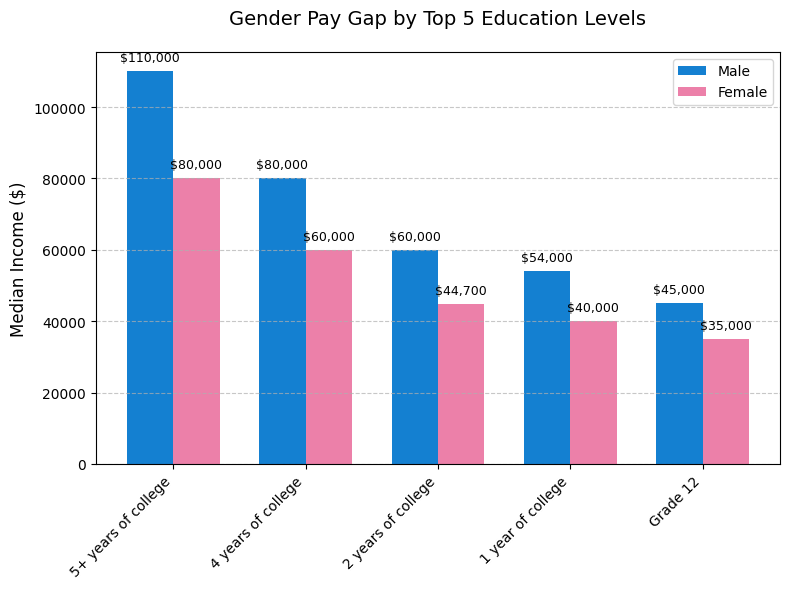

In [284]:
# ==============================================
# VISUALIZATION
# ==============================================

plt.figure(figsize=(8, 6))
width = 0.35
x = np.arange(len(educ_gender_earnings))

male_bars = plt.bar(x - width/2, educ_gender_earnings['Male_Median'], 
                   width, label='Male', color='#1480D1')
female_bars = plt.bar(x + width/2, educ_gender_earnings['Female_Median'], 
                     width, label='Female', color='#EC80A9')

# Add value labels
for i, (_, row) in enumerate(educ_gender_earnings.iterrows()):
    plt.text(i - width/2, row['Male_Median'] + 2000, 
            f"${row['Male_Median']:,.0f}", 
            ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, row['Female_Median'] + 2000, 
            f"${row['Female_Median']:,.0f}", 
            ha='center', va='bottom', fontsize=9)


plt.title('Gender Pay Gap by Top 5 Education Levels', fontsize=14, pad=20)
plt.ylabel('Median Income ($)', fontsize=12)
plt.xticks(x, educ_gender_earnings.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [279]:

# DESCRIPTIVE ANALYTICS: GENDER PAY GAP BY OCCUPATION

# 1. Filter the data
# Ensure we're working with employed individuals only
employed = abt[abt['EMPSTAT'] == 'Employed'].copy()

#Create a mapping for Occupation codes
occ_mapping = {
    '1110XX': 'Chief Executives and Legislators',
    '291020': 'Dentists',
    '291151': 'Nurse Anesthetists',
    '291210': 'Physicians',
    '291240': 'Surgeons',
    '319094': 'Medical Transcriptionists',
    '353023': 'Fast Food and Counter Workers',
    '359021': 'Dishwashers',
    '39509X': 'Other Personal Appearance Workers',
    '419041': 'Telemarketers'
}

# Create a new column with mapped occupation names
employed['OCCUPATION_NAME'] = employed['OCCSOC'].map(occ_mapping)

# 2. Calculate median income by occupation and gender
occ_gender_earnings = (
    employed.groupby(['OCCUPATION_NAME', 'SEX'])['INCEARN']
    .median()
    .unstack()
    .dropna()  # Remove occupations without both genders
    .sort_values(by='Male', ascending=False)  # Sort by male median income
    .rename(columns={'Male': 'Male_Median', 'Female': 'Female_Median'})
)

# 3. Calculate pay gap metrics
occ_gender_earnings['Pay_Gap'] = occ_gender_earnings['Male_Median'] - occ_gender_earnings['Female_Median']
occ_gender_earnings['Pay_Gap_Pct'] = (
    (occ_gender_earnings['Pay_Gap'] / occ_gender_earnings['Female_Median']) * 100
).round(1)

# 4. Get top and bottom 5 paying occupations
top5_occupations = occ_gender_earnings.head(5)
bottom5_occupations = occ_gender_earnings.tail(5)


# 6. Display results
print("="*80)
print("TOP 5 HIGHEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON")
print("="*80)
display(top5_occupations.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))

print("\n" + "="*80)
print("BOTTOM 5 LOWEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON")
print("="*80)
display(bottom5_occupations.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))


# 7. Additional analysis - sample sizes
print("\nSAMPLE SIZES FOR TOP OCCUPATIONS:")
top_occ_samples = employed[employed['OCCUPATION_NAME'].isin(top5_occupations.index)]
print(top_occ_samples.groupby(['OCCUPATION_NAME', 'SEX']).size().unstack())

print("\nSAMPLE SIZES FOR BOTTOM OCCUPATIONS:")
bottom_occ_samples = employed[employed['OCCUPATION_NAME'].isin(bottom5_occupations.index)]
print(bottom_occ_samples.groupby(['OCCUPATION_NAME', 'SEX']).size().unstack())

TOP 5 HIGHEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON



BOTTOM 5 LOWEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON



SAMPLE SIZES FOR TOP OCCUPATIONS:
SEX                               Female  Male
OCCUPATION_NAME                               
Chief Executives and Legislators    1960  5042
Dentists                             140   342
Nurse Anesthetists                    93    77
Physicians                          1373  2389
Surgeons                              58   217

SAMPLE SIZES FOR BOTTOM OCCUPATIONS:
SEX                                Female  Male
OCCUPATION_NAME                                
Dishwashers                            53   190
Fast Food and Counter Workers         430   249
Medical Transcriptionists              97    11
Other Personal Appearance Workers      27     3
Telemarketers                          38    19


In [291]:
dqr_cont[['Feature','Card.','Median']]

Feature  Card.   Median
0      PERWT   1055     81.0
1        IND    262   7270.0
2   WKSWORK1      3     52.0
3   UHRSWORK     65     40.0
4     INCTOT  11356  58000.0
5    INCWAGE    935  53000.0
6   INCINVST    695      0.0
7   INCOTHER    500      0.0
8    INCEARN   2952  55000.0
9   TRANTIME    141     15.0
10   DEPARTS    151    702.0
11   ARRIVES    286    719.0

In [292]:
dqr_cat[['Feature','Card.','Mode']]

Feature  Card.                                    Mode
0       REGION      9                 South Atlantic Division
1     STATEFIP     51                              California
2       NCHILD     10                      0 children present
3          SEX      2                                    Male
4          AGE     79                                      50
5        MARST      6                 Married, spouse present
6       MARRNO      4                            Married once
7         RACE      9                                   White
8        RACED    139                                   White
9          BPL    123                              California
10        BPLD    219                              California
11    ANCESTR1    206                            Not Reported
12   ANCESTR1D    233                            Not Reported
13     CITIZEN      3                     Naturalized citizen
14     YRNATUR     75                                     nan
15    LANGUAGE     63                                 English
16   LANGUAGED    115                                 English
17    SPEAKENG      5                Yes, speaks only English
18        EDUC     11                                Grade 12
19       EDUCD     24                       Bachelor's degree
20    DEGFIELD     37                                Business
21   DEGFIELDD    172  Business Management and Administration
22   DEGFIELD2     37                                Business
23  DEGFIELD2D    171                              Psychology
24     EMPSTAT      1                                Employed
25    EMPSTATD      1                                 At work
26    CLASSWKR      2                         Works for wages
27   CLASSWKRD      8                    Wage/salary, private
28      OCCSOC    525                                  1191XX
29    TRANWORK     12                     Auto, truck, or van

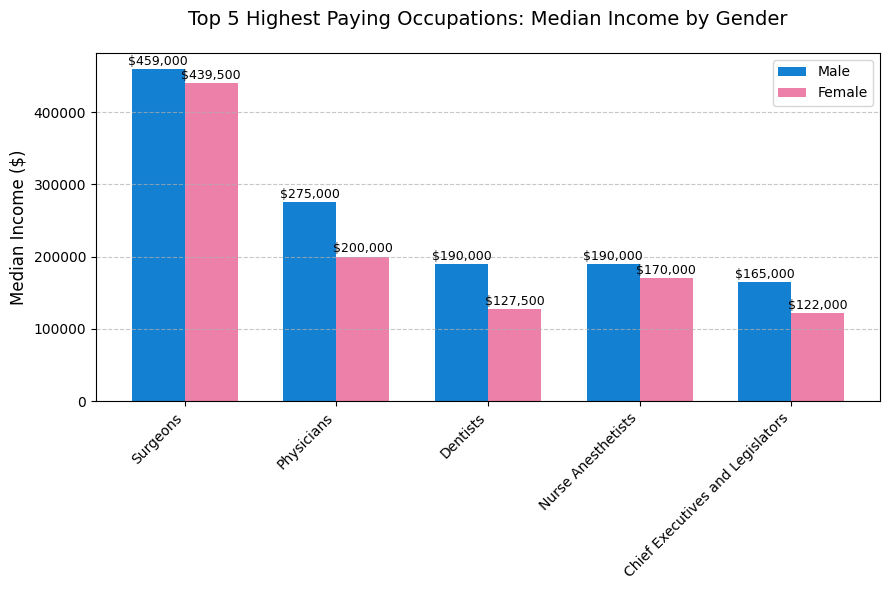

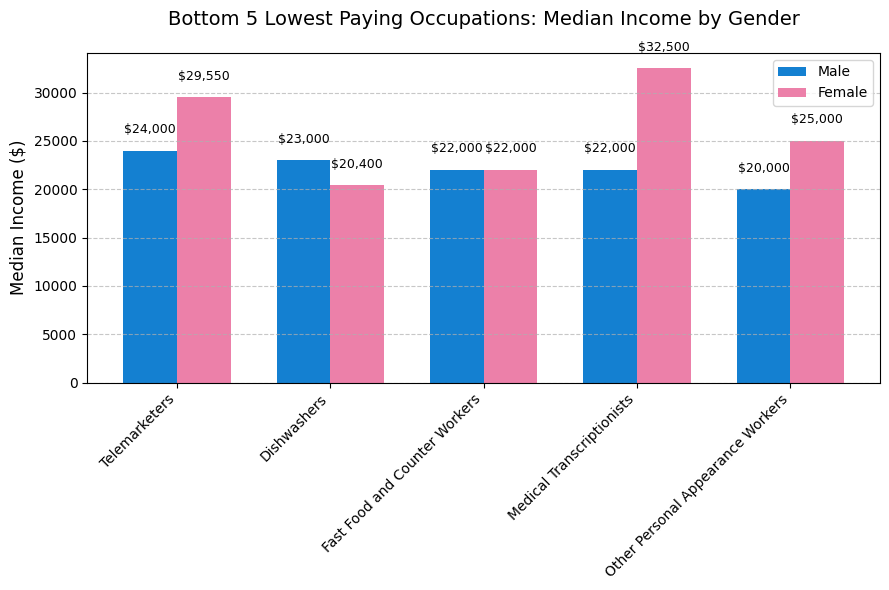

In [293]:
# 5. Create visualization function
def plot_occupation_earnings(df, title):
    plt.figure(figsize=(9, 6))
    width = 0.35
    
    occupations = df.index
    x = np.arange(len(occupations))
    
    male_bars = plt.bar(x - width/2, df['Male_Median'], width, 
                       label='Male', color='#1480D1')
    female_bars = plt.bar(x + width/2, df['Female_Median'], width, 
                         label='Female', color='#EC80A9')
    
    # Add value labels
    for i, (_, row) in enumerate(df.iterrows()):
        plt.text(i - width/2, row['Male_Median'] + 1500, 
                f"${row['Male_Median']:,.0f}", 
                ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, row['Female_Median'] + 1500, 
                f"${row['Female_Median']:,.0f}", 
                ha='center', va='bottom', fontsize=9)
    
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Median Income ($)', fontsize=12)
    plt.xticks(x, occupations, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_occupation_earnings(top5_occupations, 
                        "Top 5 Highest Paying Occupations: Median Income by Gender")
plot_occupation_earnings(bottom5_occupations, 
                        "Bottom 5 Lowest Paying Occupations: Median Income by Gender")

In [294]:
# Calculate mean work hours by occupation and gender
occ_gender_hours = (
    employed.groupby(['OCCUPATION_NAME', 'SEX'])['UHRSWORK']
    .mean()
    .unstack()
    .dropna()
    .loc[top5_occupations.index.union(bottom5_occupations.index)]  # Keep same occupations
    .rename(columns={'Male': 'Male_Hours', 'Female': 'Female_Hours'})
)

# Calculate hours difference
occ_gender_hours['Hours_Diff'] = occ_gender_hours['Male_Hours'] - occ_gender_hours['Female_Hours']
occ_gender_hours['Hours_Diff_Pct'] = (
    (occ_gender_hours['Hours_Diff'] / occ_gender_hours['Female_Hours']) * 100
).round(1)

# Split into top and bottom
top5_hours = occ_gender_hours.loc[top5_occupations.index]
bottom5_hours = occ_gender_hours.loc[bottom5_occupations.index]

# Hours Analysis
print("\n" + "="*80)
print("TOP 5 HIGHEST PAYING OCCUPATIONS - WORK HOURS COMPARISON")
print("="*80)
display(top5_hours.style.format({
    'Male_Hours': '{:.1f}',
    'Female_Hours': '{:.1f}',
    'Hours_Diff': '{:.1f}',
    'Hours_Diff_Pct': '{:.1f}%'
}))


print("\n" + "="*80)
print("BOTTOM 5 LOWEST PAYING OCCUPATIONS - WORK HOURS COMPARISON")
print("="*80)
display(bottom5_hours.style.format({
    'Male_Hours': '{:.1f}',
    'Female_Hours': '{:.1f}',
    'Hours_Diff': '{:.1f}',
    'Hours_Diff_Pct': '{:.1f}%'
}))


# Sample Sizes
print("\nSAMPLE SIZES FOR TOP OCCUPATIONS:")
top_occ_samples = employed[employed['OCCUPATION_NAME'].isin(top5_occupations.index)]
print(top_occ_samples.groupby(['OCCUPATION_NAME', 'SEX']).size().unstack())

print("\nSAMPLE SIZES FOR BOTTOM OCCUPATIONS:")
bottom_occ_samples = employed[employed['OCCUPATION_NAME'].isin(bottom5_occupations.index)]
print(bottom_occ_samples.groupby(['OCCUPATION_NAME', 'SEX']).size().unstack())


TOP 5 HIGHEST PAYING OCCUPATIONS - WORK HOURS COMPARISON



BOTTOM 5 LOWEST PAYING OCCUPATIONS - WORK HOURS COMPARISON



SAMPLE SIZES FOR TOP OCCUPATIONS:
SEX                               Female  Male
OCCUPATION_NAME                               
Chief Executives and Legislators    1960  5042
Dentists                             140   342
Nurse Anesthetists                    93    77
Physicians                          1373  2389
Surgeons                              58   217

SAMPLE SIZES FOR BOTTOM OCCUPATIONS:
SEX                                Female  Male
OCCUPATION_NAME                                
Dishwashers                            53   190
Fast Food and Counter Workers         430   249
Medical Transcriptionists              97    11
Other Personal Appearance Workers      27     3
Telemarketers                          38    19


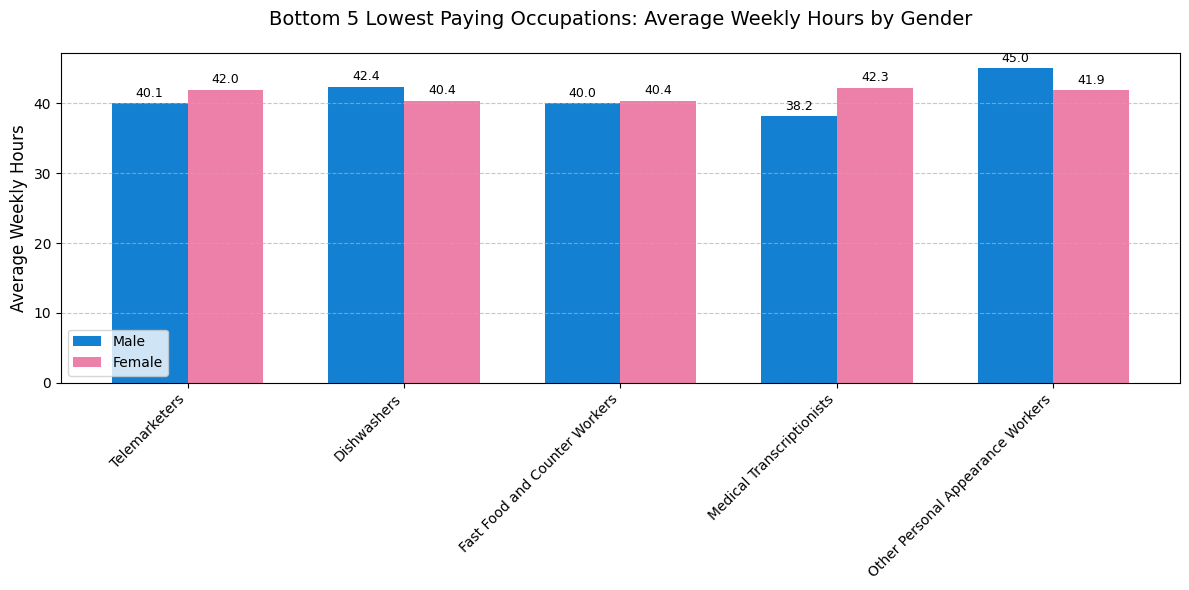

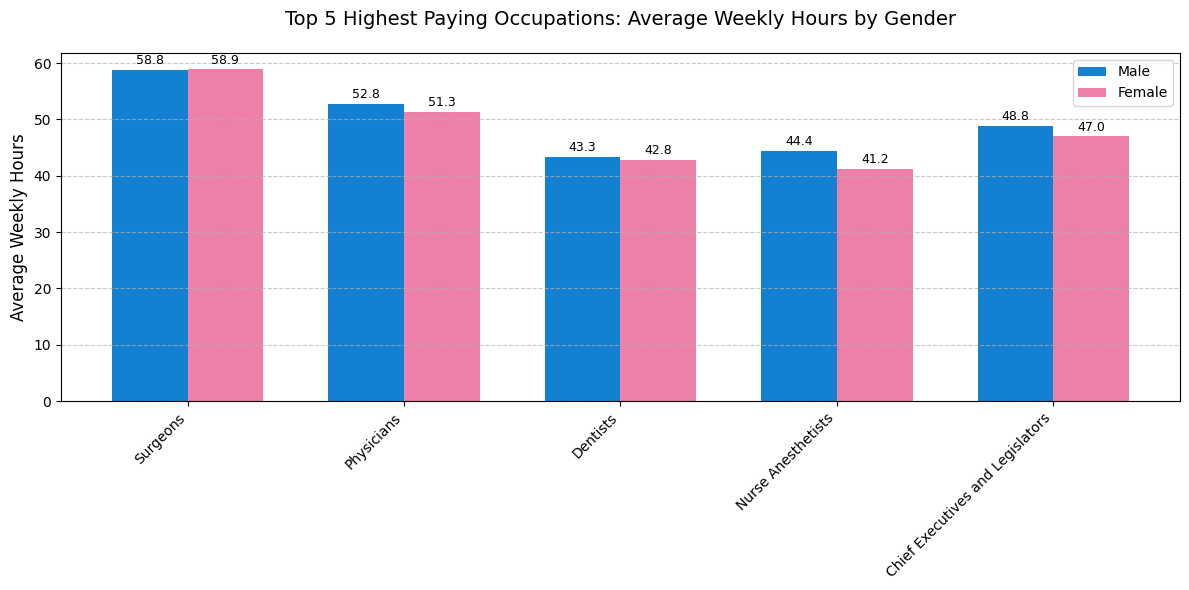

In [295]:
def plot_occupation_hours(df, title):
    plt.figure(figsize=(12, 6))
    width = 0.35
    
    occupations = df.index
    x = np.arange(len(occupations))
    
    male_bars = plt.bar(x - width/2, df['Male_Hours'], width, 
                       label='Male', color='#1480D1')
    female_bars = plt.bar(x + width/2, df['Female_Hours'], width, 
                         label='Female', color='#EC80A9')
    
    # Add value labels
    for i, (_, row) in enumerate(df.iterrows()):
        plt.text(i - width/2, row['Male_Hours'] + 0.5, 
                f"{row['Male_Hours']:.1f}", 
                ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, row['Female_Hours'] + 0.5, 
                f"{row['Female_Hours']:.1f}", 
                ha='center', va='bottom', fontsize=9)
    
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Average Weekly Hours', fontsize=12)
    plt.xticks(x, occupations, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_occupation_hours(bottom5_hours, 
                     "Bottom 5 Lowest Paying Occupations: Average Weekly Hours by Gender")

plot_occupation_hours(top5_hours, 
                     "Top 5 Highest Paying Occupations: Average Weekly Hours by Gender")

In [296]:
# ==============================================
# DESCRIPTIVE ANALYTICS: GENDER PAY GAP BY EDUCATION LEVEL
# ==============================================

# 1. Filter the data for employed individuals
employed= abt[abt['EMPSTAT'] == 'Employed'].copy()

# 2. Get top 5 most common education levels
top_5_educ = employed['EDUC'].value_counts().head(5).index

# 3. Calculate median income by education and gender
educ_gender_earnings = (
    employed[employed['EDUC'].isin(top_5_educ)]
    .groupby(['EDUC', 'SEX'])['INCEARN']
    .median()
    .unstack()
    .dropna()  # Remove education levels without both genders
    .sort_values(by='Male', ascending=False)
    .rename(columns={'Male': 'Male_Median', 'Female': 'Female_Median'})
)

# 4. Calculate pay gap metrics
educ_gender_earnings['Pay_Gap'] = educ_gender_earnings['Male_Median'] - educ_gender_earnings['Female_Median']
educ_gender_earnings['Pay_Gap_Pct'] = (
    (educ_gender_earnings['Pay_Gap'] / educ_gender_earnings['Female_Median']) * 100
).round(1)


# 6. Display results
print("="*80)
print("GENDER EARNINGS COMPARISON BY TOP 5 EDUCATION LEVELS")
print("="*80)
display(educ_gender_earnings.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))

# 7. Sample sizes
print("\nSAMPLE SIZES BY EDUCATION LEVEL AND GENDER:")
educ_samples = employed[employed['EDUC'].isin(top_5_educ)]
print(educ_samples.groupby(['EDUC', 'SEX']).size().unstack())



GENDER EARNINGS COMPARISON BY TOP 5 EDUCATION LEVELS



SAMPLE SIZES BY EDUCATION LEVEL AND GENDER:
SEX                  Female   Male
EDUC                              
1 year of college     26490  34130
2 years of college    23700  24068
4 years of college    61890  69933
5+ years of college   44506  44792
Grade 12              57512  92228


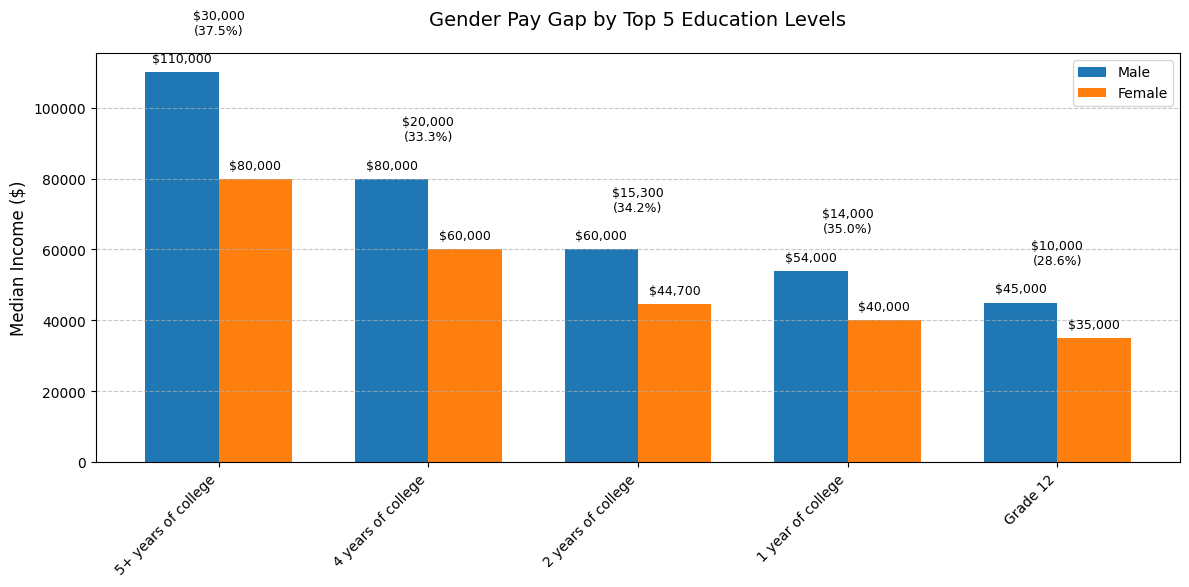

In [297]:
# ==============================================
# VISUALIZATION
# ==============================================

plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(educ_gender_earnings))

male_bars = plt.bar(x - width/2, educ_gender_earnings['Male_Median'], 
                   width, label='Male', color='#1f77b4')
female_bars = plt.bar(x + width/2, educ_gender_earnings['Female_Median'], 
                     width, label='Female', color='#ff7f0e')

# Add value labels
for i, (_, row) in enumerate(educ_gender_earnings.iterrows()):
    plt.text(i - width/2, row['Male_Median'] + 2000, 
            f"${row['Male_Median']:,.0f}", 
            ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, row['Female_Median'] + 2000, 
            f"${row['Female_Median']:,.0f}", 
            ha='center', va='bottom', fontsize=9)
    plt.text(i, max(row['Male_Median'], row['Female_Median']) + 10000, 
            f"${row['Pay_Gap']:,.0f}\n({row['Pay_Gap_Pct']}%)", 
            ha='center', va='bottom', fontsize=9)

plt.title('Gender Pay Gap by Top 5 Education Levels', fontsize=14, pad=20)
plt.ylabel('Median Income ($)', fontsize=12)
plt.xticks(x, educ_gender_earnings.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 3B. Data Distribution

##### Histograms

In [298]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme, element_text, theme_classic, scale_y_continuous

# Melt the DataFrame to long format
abt_cont_melted = abt[continuous_cols].melt(var_name='column', value_name='value')

# Calculate the number of rows and columns for the facet grid
n_cols = 4
n_rows = math.ceil(len(continuous_cols) / n_cols)

# Create the plot
cont_plot = (ggplot(abt_cont_melted, aes(x='value')) +
    geom_histogram(bins=20, fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=n_rows, ncol=n_cols, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(panel_spacing=0.03,  # Adjust the spacing between panels
        figure_size=(80/n_cols, n_rows * 4),  # Dynamically set figure size based on number of columns and rows
        strip_text_x=element_text(size=10),
        axis_text=element_text(size=8)  # Adjust axis text size for a tighter layout
        #axis_title=element_text(size=10),  # Option to increase axis title size
        #plot_title=element_text(size=12)  # Option to increase plot title size
                 ) +
    scale_y_continuous(expand=(0, 0))  # Force the y-axis to start at zero
)

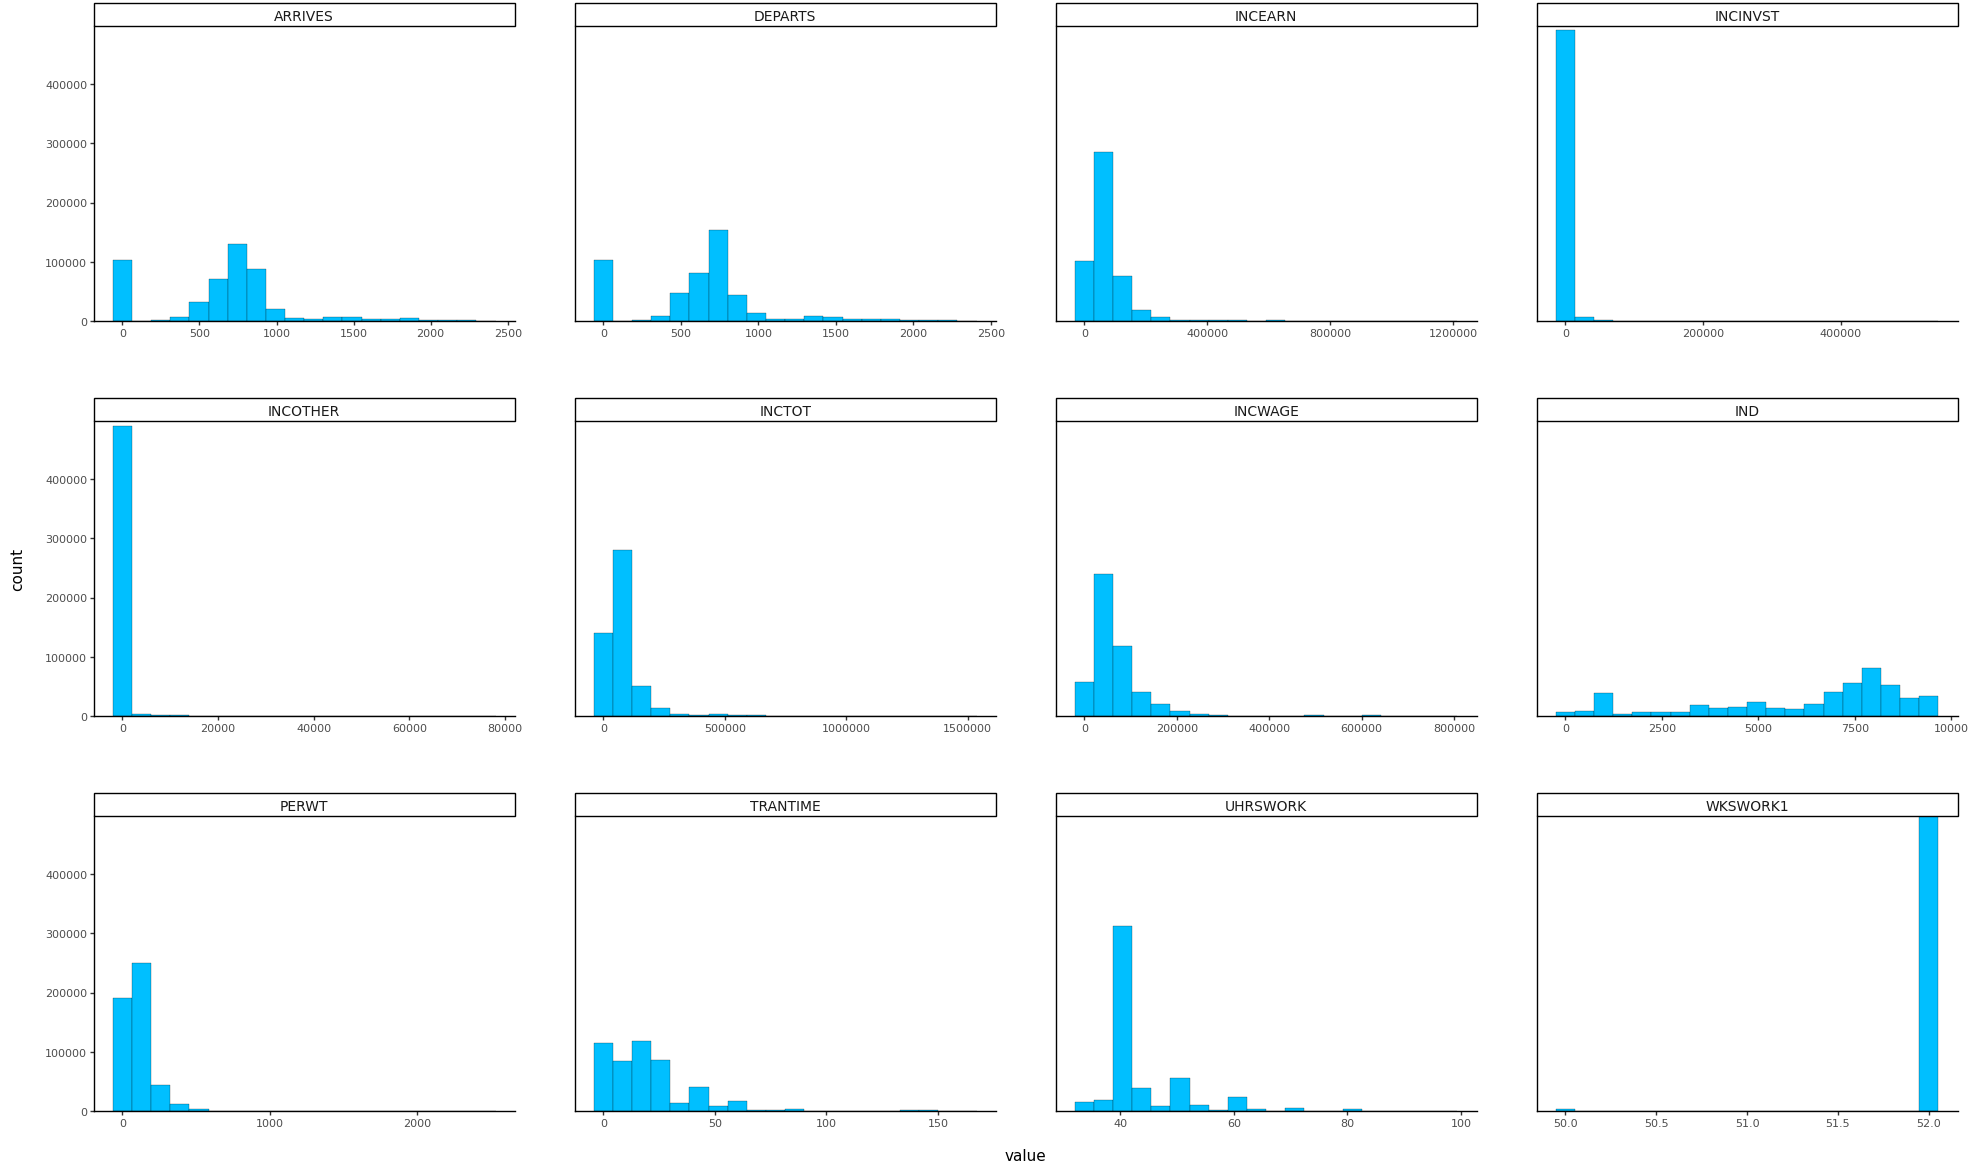

In [299]:
cont_plot.draw()

#### Bar Plots

Bar plots to visualize categorical columns. We will only visualize those with low-medium cardinality.

In [300]:
small_cat = dqr_cat.loc[dqr_cat['Card.'] < 30, 'Feature'].tolist()
small_cat.remove('EMPSTAT')
small_cat.remove('EMPSTATD')

In [301]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, theme_classic, theme, element_text, ggsave)

# Melt categorical columns for visualization
abt_cat_melted = abt[small_cat].melt(var_name='column', value_name='value')

# Design bar plots 
cat_plot = (
    ggplot(abt_cat_melted, aes(x='value')) +
    geom_bar(fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(20, 30),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
        # plot_title=element_text(size=36)  # Uncomment for plot title size
    )
)

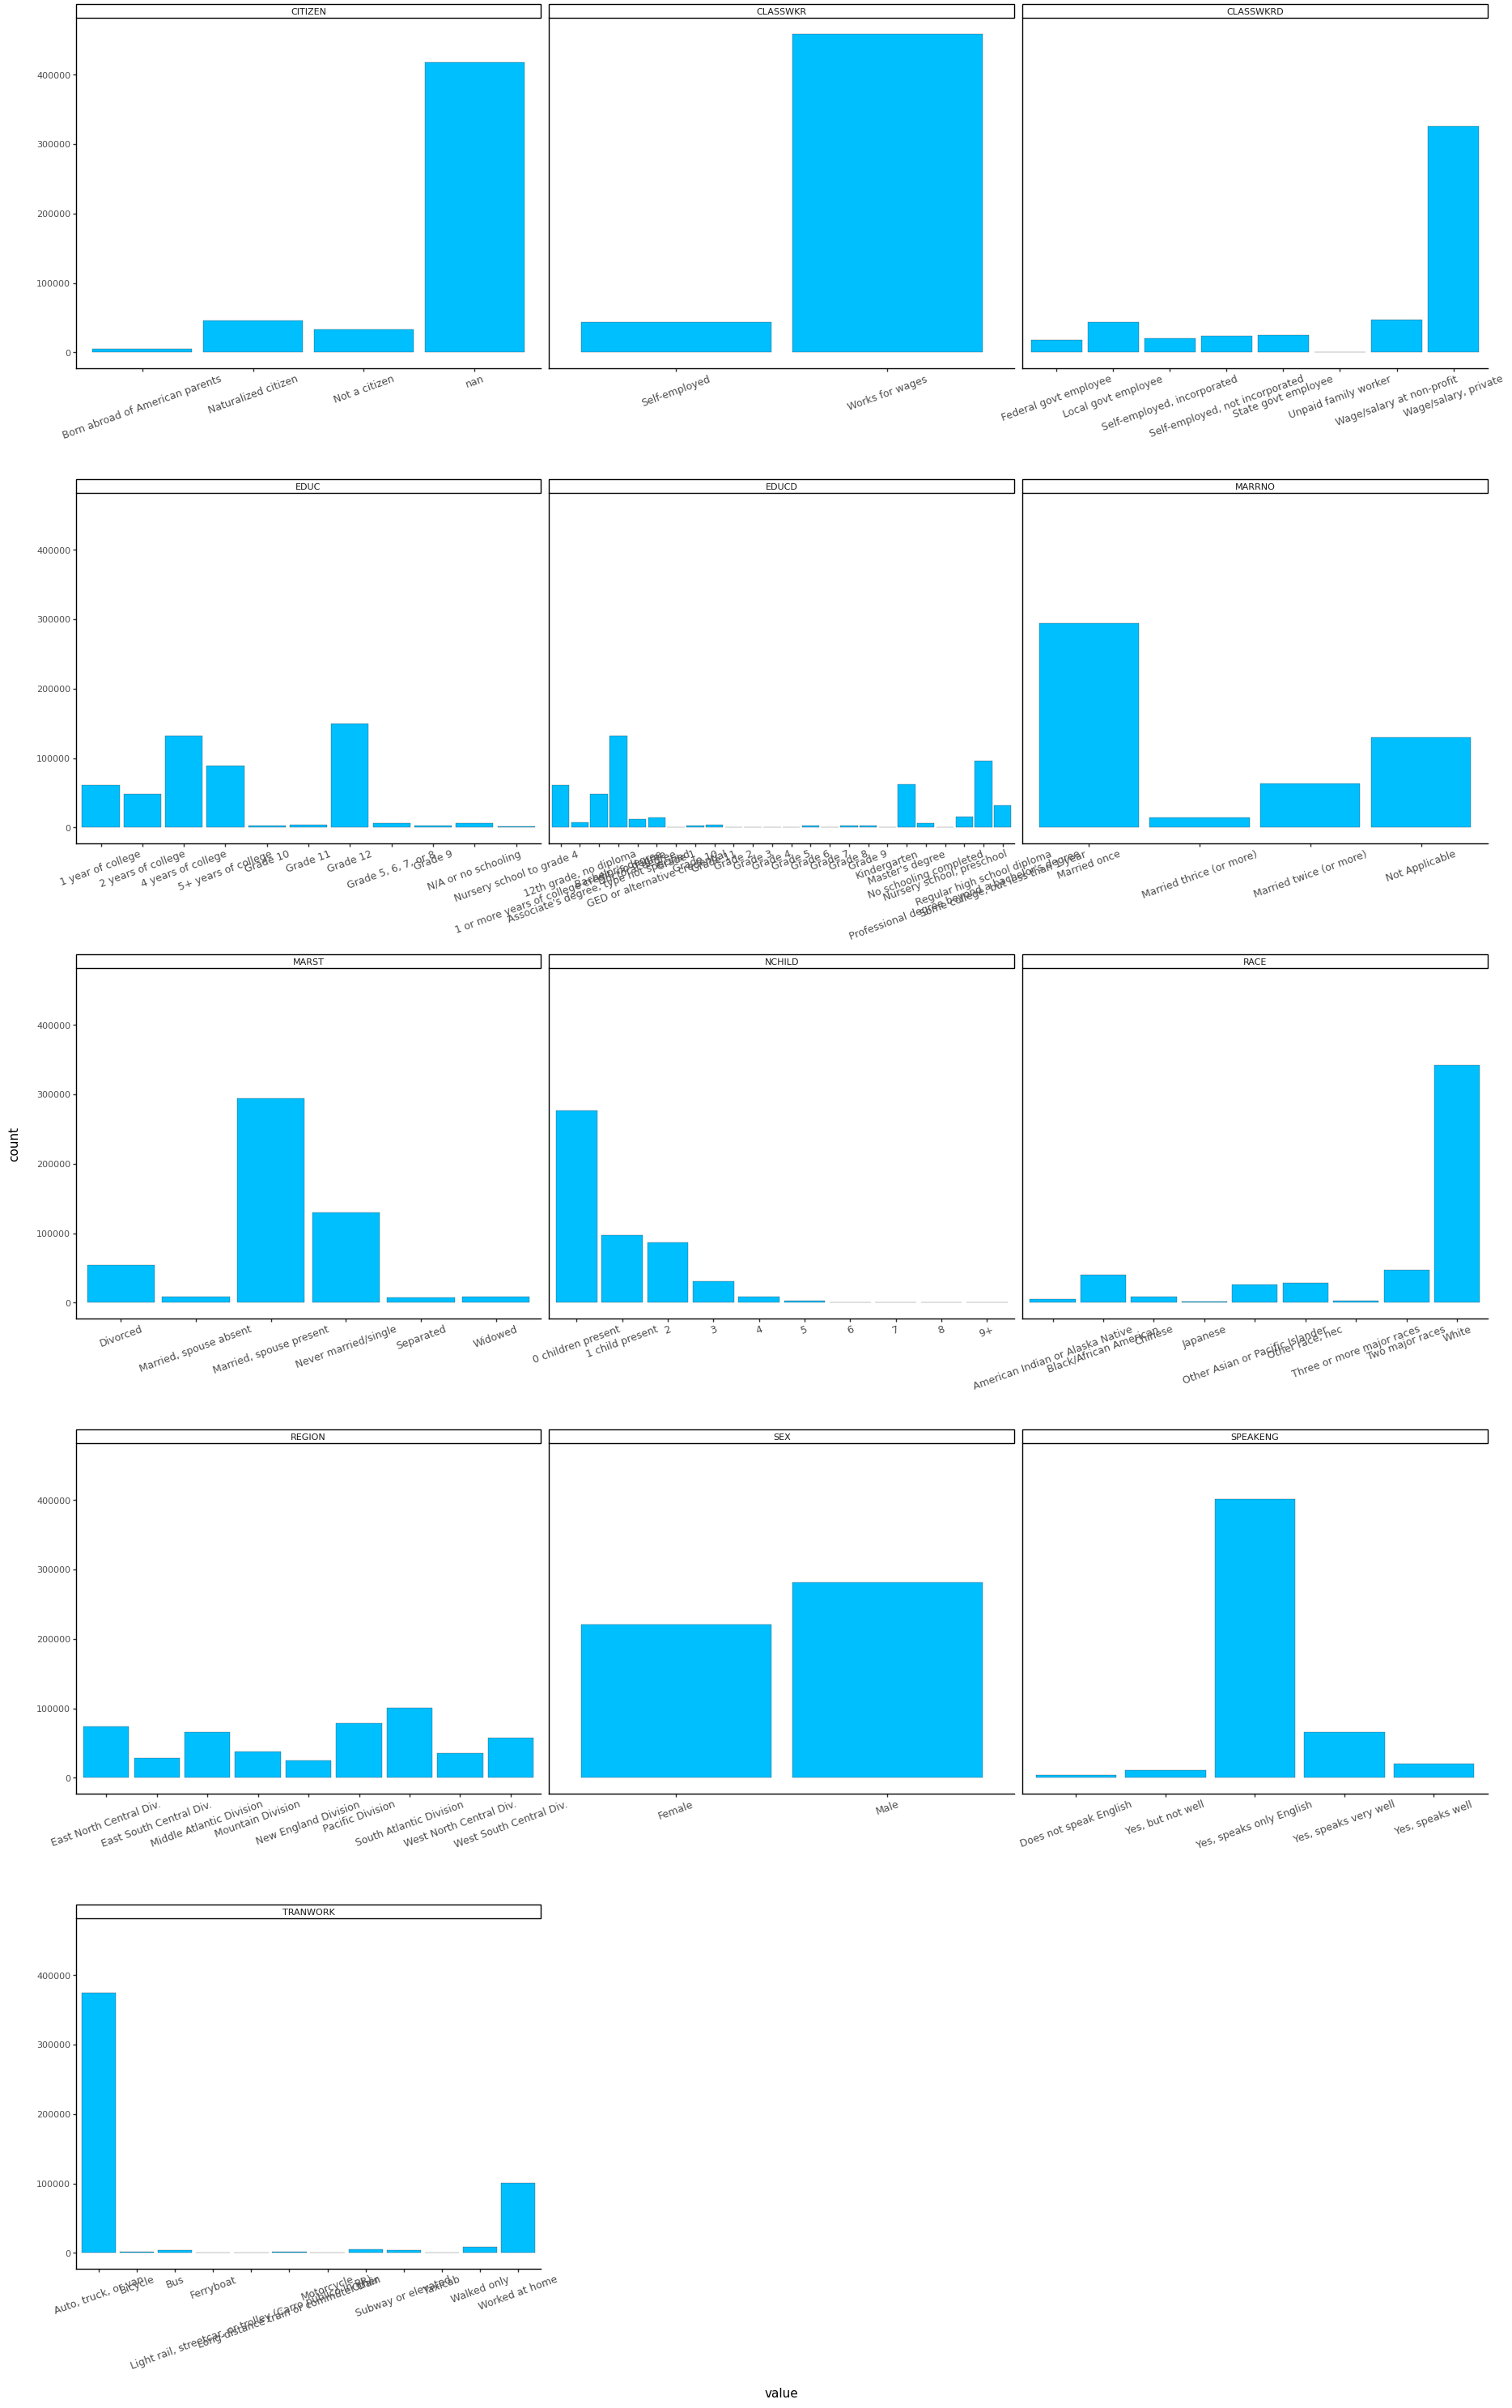

In [302]:
cat_plot.draw()

##### Bar Plots By Class and Feature

Next, we explore relationships in our data by comparing the fequency of out target class to the fequency of those outside that class, across different features.

In [303]:
# TBD - target column to be identified

In [304]:
# Melt categorical columns for visualization
abt_cat_melted = abt.melt(id_vars=['INCEARN'], value_vars=categorical_cols, var_name='column', value_name='value')

# Design bar plots 
y_plot = (
    ggplot(abt_cat_melted, aes(x='value', fill='factor(EDUC)')) +
    geom_bar(position='dodge', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(10, 12),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
    )
)

In [305]:
#y_plot.draw()

Optional Comment

## Relationships

##### Scatterplots

KeyboardInterrupt: 

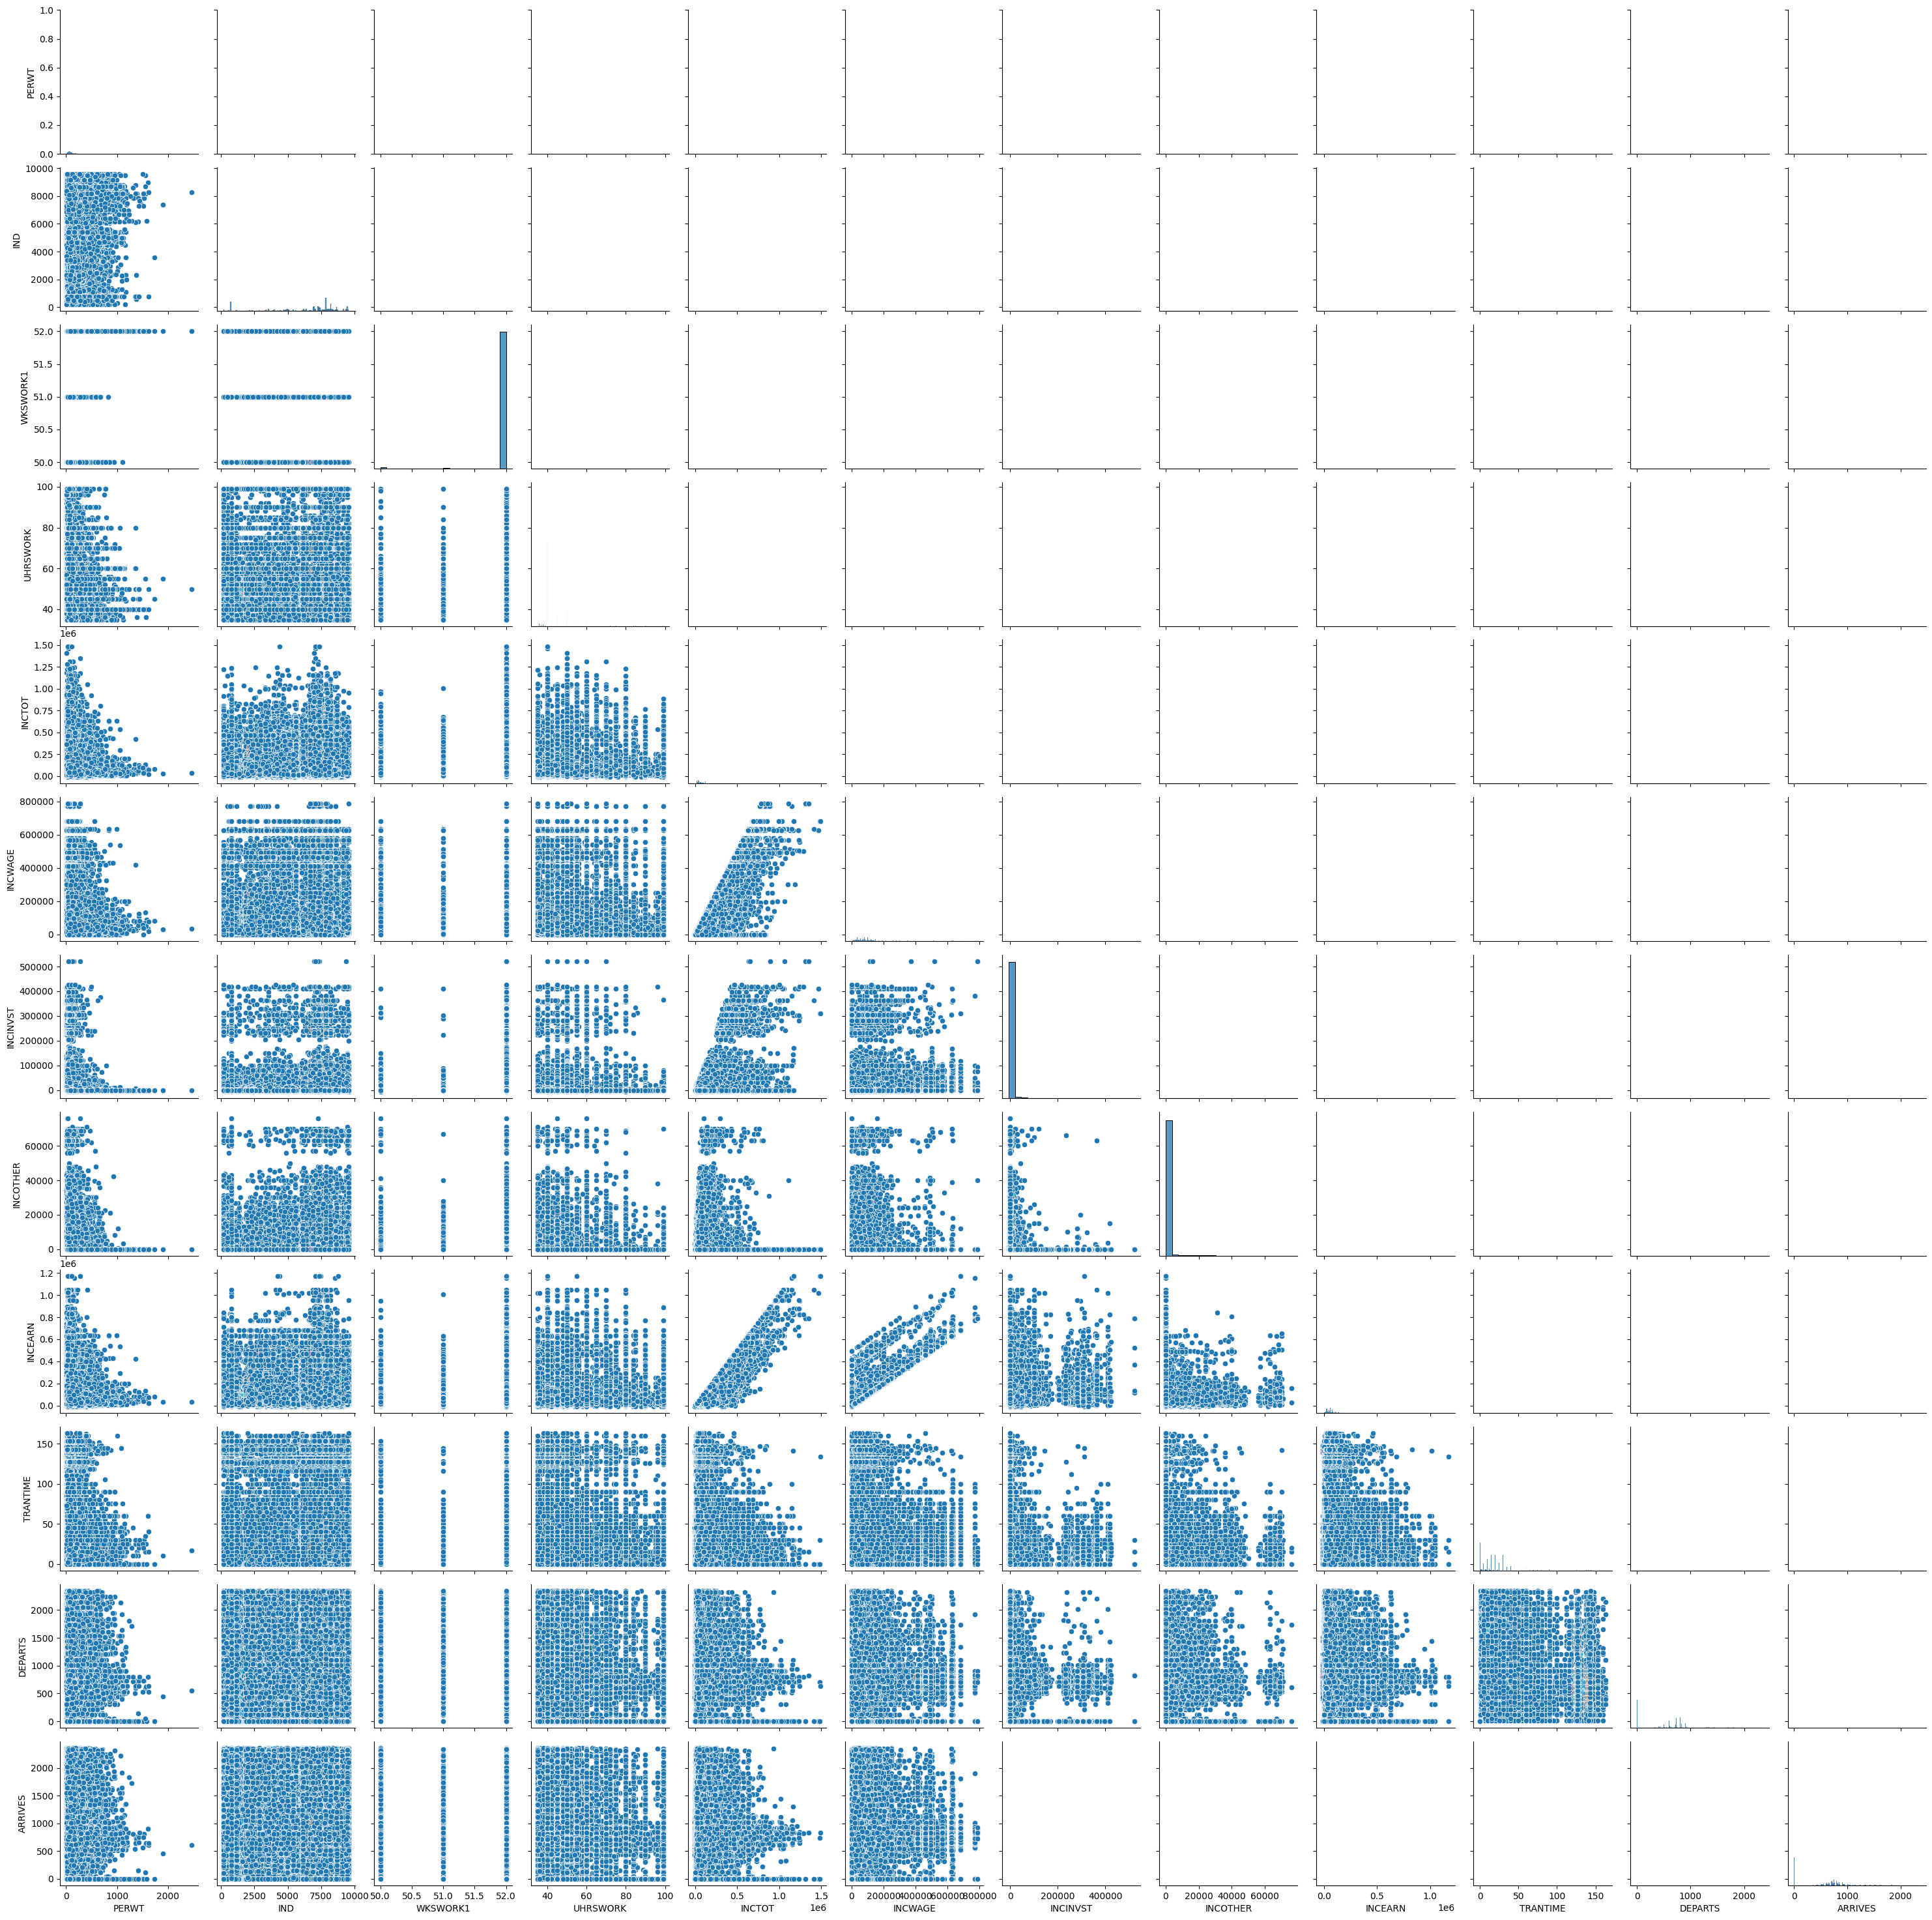

In [306]:
## create a pairplot to visualize the relationships between multiple numeric columns
# This may take a while to render and will not show in the GitHub Preview. Uncomment to run this in JupyterLab.
sns.pairplot(abt[continuous_cols])

In [ ]:
plt.show()

Based on the shape of PERWT and INCTOT, the distribution of income is wider when a person's weight is lower. We should be cautious about using this feature, however, because income can affect the food available, i.e., fast food rather than healthy food. The causal relationaship is in the opposite direction from what would be needed to PREDICT income. The same is true about transit time.

##### Correlation

In [ ]:
correlation_matrix = abt[continuous_cols].corr()

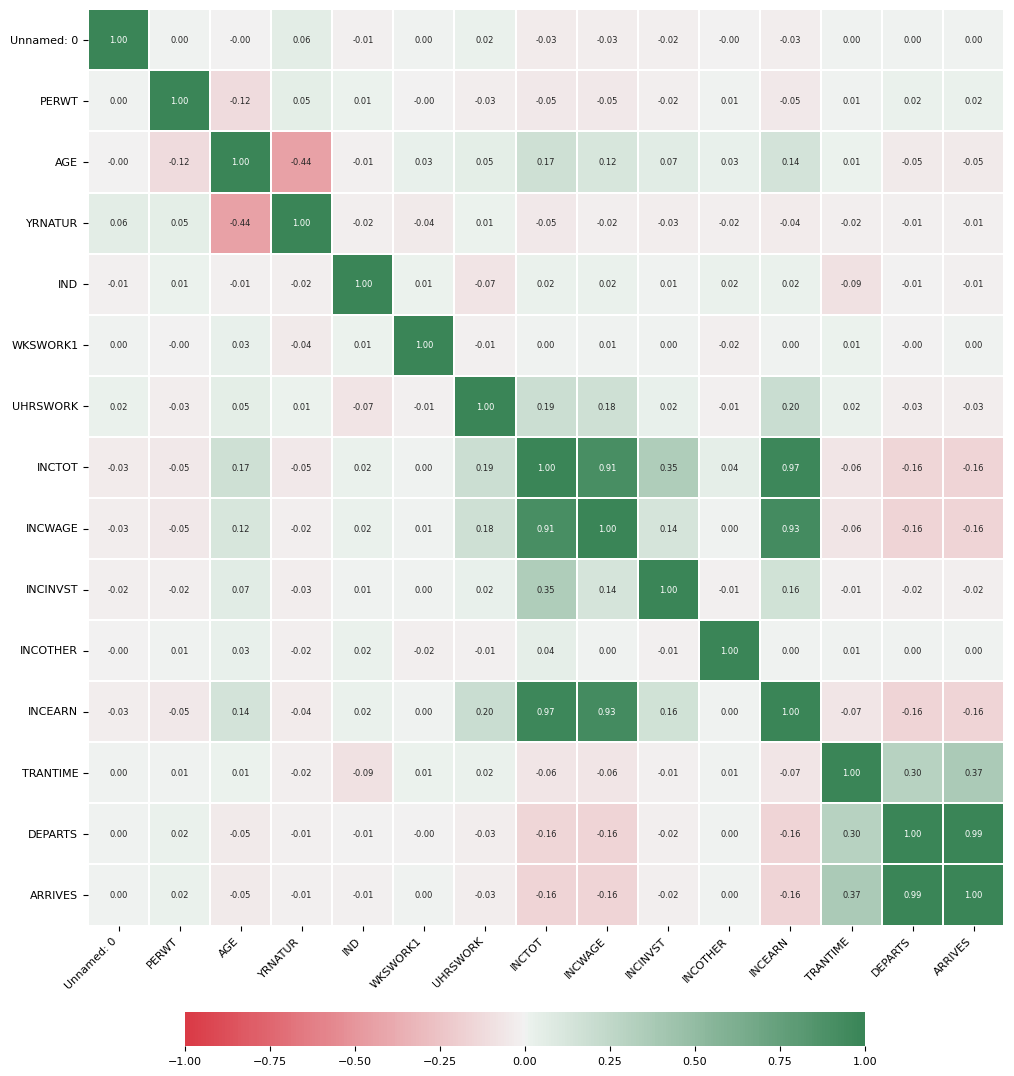

In [ ]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

In [ ]:
# Now we create a filtered correlation matrix that only shows features with moderate to strong correlations.
# This doesn't mean all correlations shown are strong, but that features with only weak correlations have been removed for readability.

filtered_corr_matrix = correlation_matrix.copy()
for col in correlation_matrix.columns:
    if ((correlation_matrix[col].abs() <= 0.4).all()) or ((correlation_matrix[col].abs() <= 0.4).sum() == len(correlation_matrix) - 1):
        filtered_corr_matrix.drop(col, axis=1, inplace=True)
        filtered_corr_matrix.drop(col, axis=0, inplace=True)

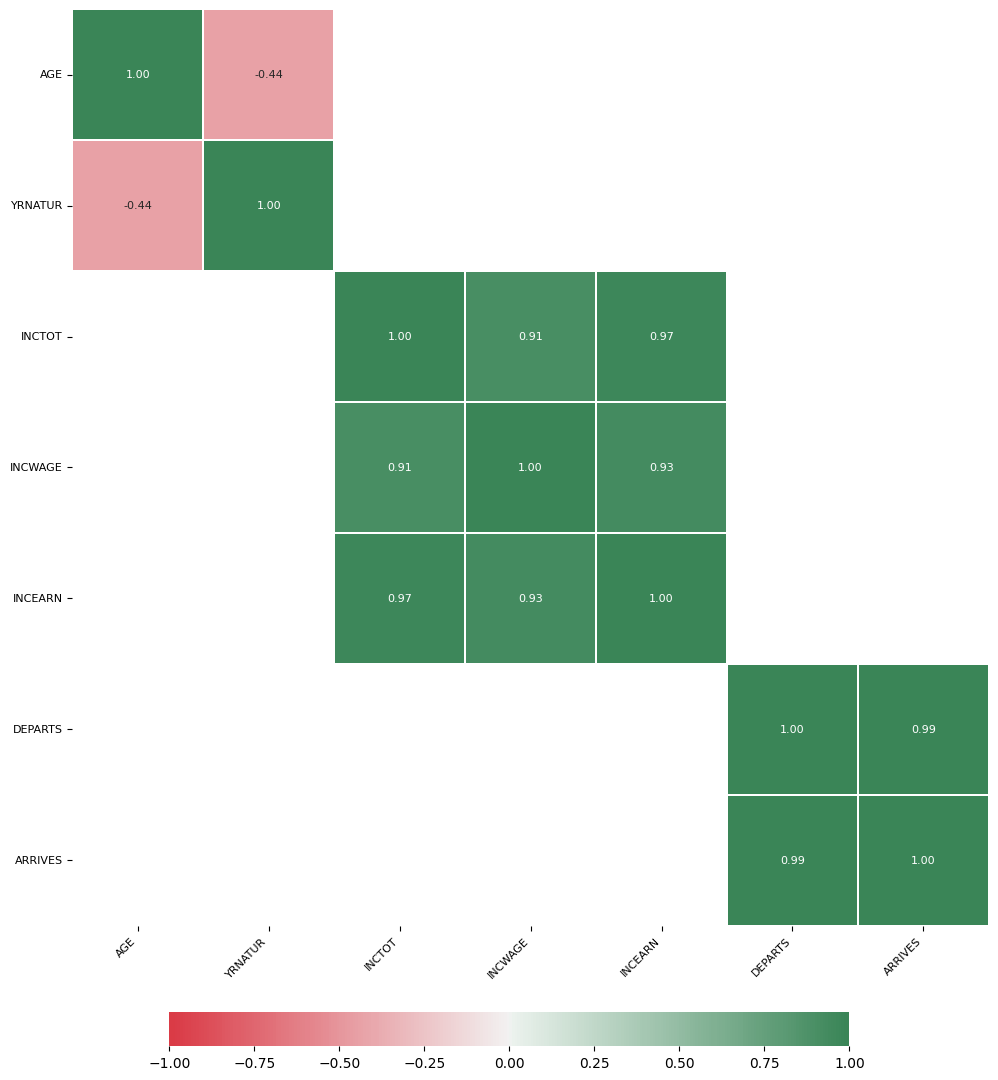

In [ ]:
# visualizing correlations >.4

plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
filtered_corr_matrix[filtered_corr_matrix.abs() > .4],
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 8},  # Set font size for correlation coefficients
    linewidths=.1, # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

Very high multicollinearity on some features

<br>

### Cramer's V Correlation Matrix

In order to understand the relationship between features, we will use a correlation matrix. Cramer's matrix is suitable for categorical variables and ranges from 0 (no association) to 1 (high association).

In [ ]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))  # Cross table building
    if crosstab.size == 0:
        return 0  # Handle empty cross table
    stat = chi2_contingency(crosstab)[0]  # Keeping the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = min(crosstab.shape) - 1  # Take the minimum value between the columns and the rows of the cross table
    if mini == 0 or obs == 0:
        return 0  # Handle division by zero
    return np.sqrt(stat / (obs * mini))

In [ ]:
from scipy.stats import chi2_contingency

rows = []

for var1 in abt[categorical_cols]:
    col = []
    for var2 in abt[categorical_cols]:
        cramers = cramers_V(abt[categorical_cols][var1], abt[categorical_cols][var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
matrix = pd.DataFrame(cramers_results, columns=abt[categorical_cols].columns, index=abt[categorical_cols].columns)


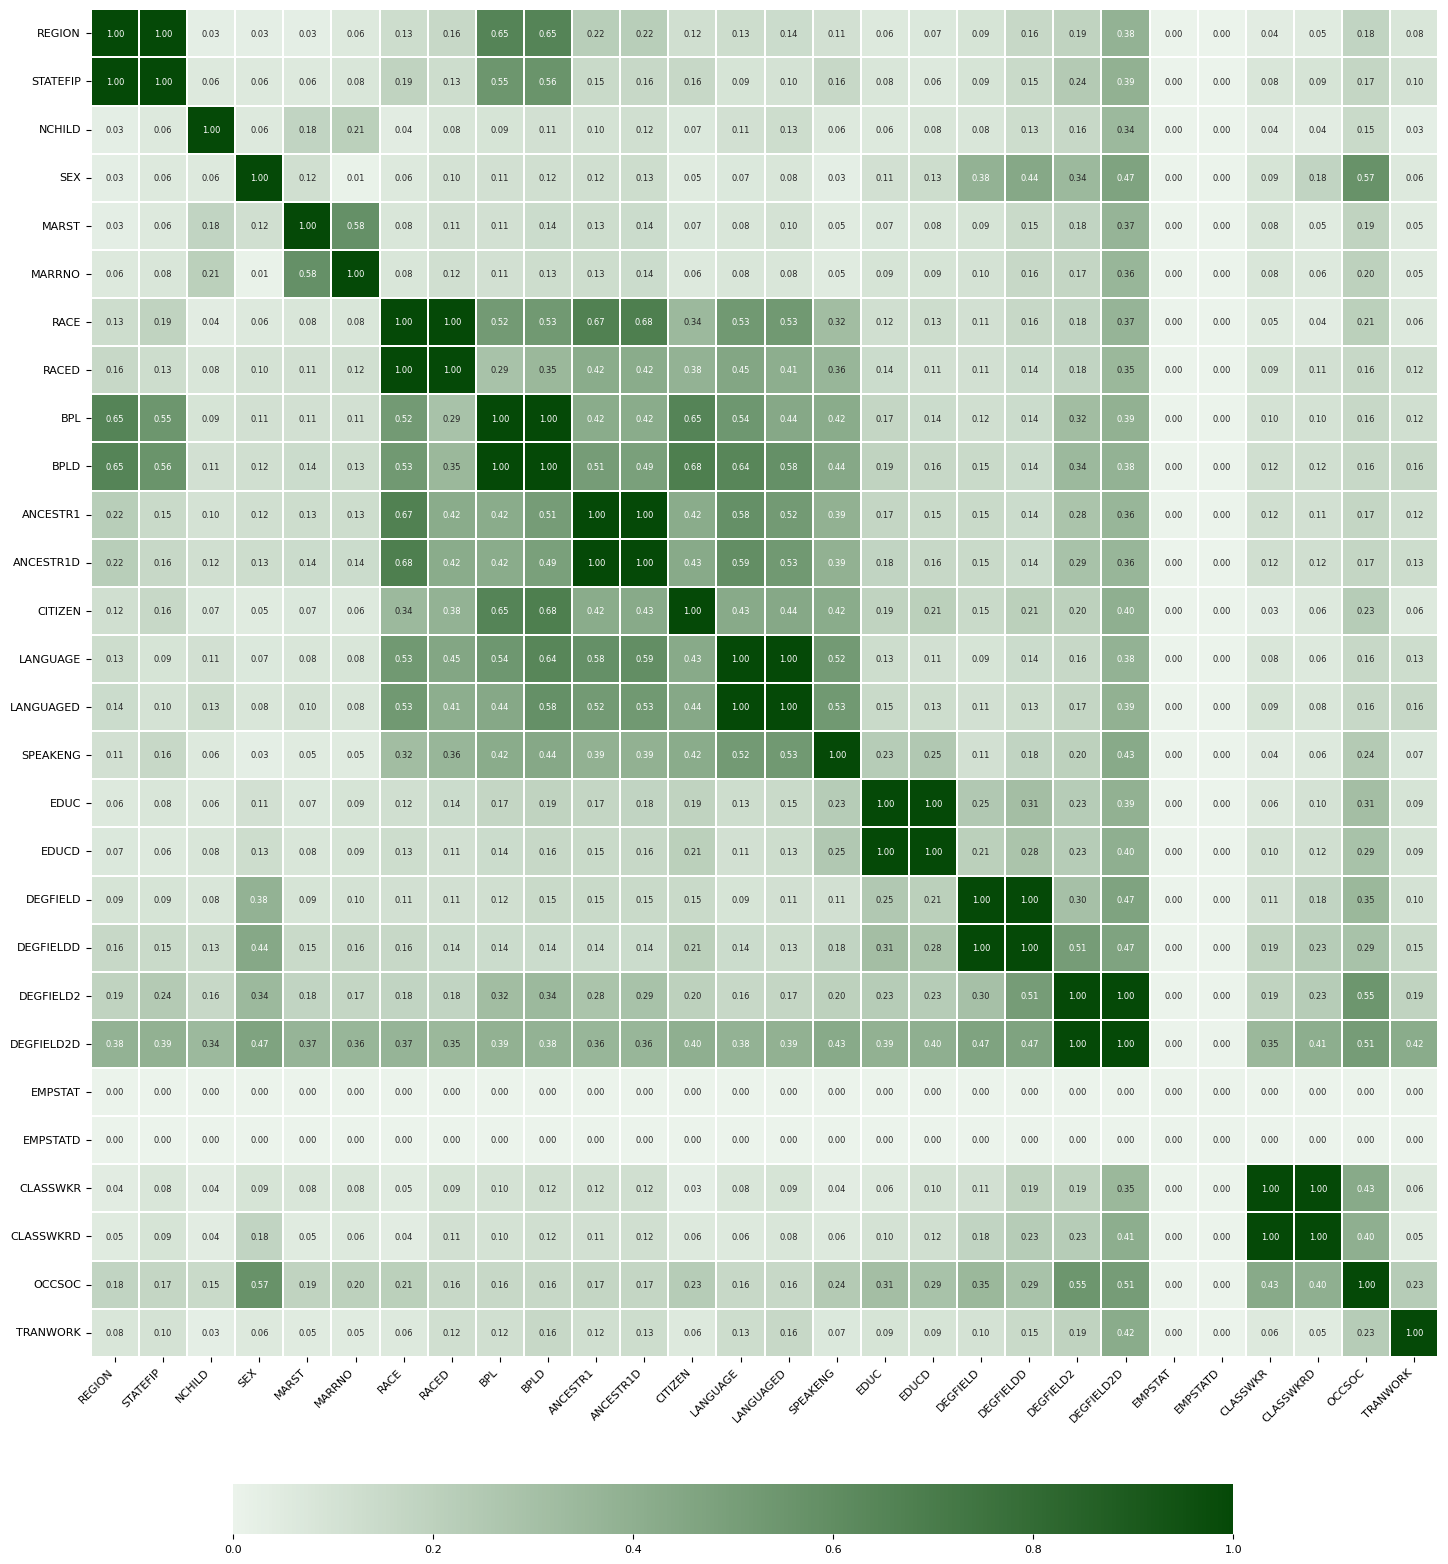

In [ ]:
plt.figure(figsize=(25, 25))

axis_corr = sns.heatmap(
matrix,
vmin=0, vmax=1, center=0.5,
cmap = sns.light_palette("darkgreen", as_cmap=True, input="xkcd"),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

<br>

This matrix shows us that the features with "D" are perfectly correlated with the features that have the same name without 'D'. We can eliminate one of these. <br>
Degree and occupation have a strong association, unsurprisingly. Citizen and occupation have a high association. Class of the worker has high association with DEGFIELD2D. This needs more review.

In [307]:
abt.loc[:, ['EDUC','EDUCD']].head(10)

EDUC                                         EDUCD
0    1 year of college  1 or more years of college credit, no degree
1             Grade 12                   Regular high school diploma
2             Grade 12            Some college, but less than 1 year
3    1 year of college  1 or more years of college credit, no degree
4             Grade 12            Some college, but less than 1 year
5             Grade 12            Some college, but less than 1 year
6  5+ years of college                               Master's degree
7             Grade 12            Some college, but less than 1 year
8             Grade 12                   Regular high school diploma
9             Grade 12            Some college, but less than 1 year

## Pre-Processing

#### Drop Features and Rows

In [308]:
abt = abt[abt['CLASSWKRD'] != 'Unpaid family worker'].copy()

In [309]:
# features with 'D' in their name appear to be similar in content to those with the same name less the 'D' so we need only keep those without the 'D'
feature_names = abt.columns.tolist()

D_features = [f for f in feature_names if f + 'D' in feature_names]
D_features = [f + 'D' for f in D_features]

print(D_features)

['RACED', 'BPLD', 'ANCESTR1D', 'LANGUAGED', 'EDUCD', 'DEGFIELDD', 'DEGFIELD2D', 'EMPSTATD', 'CLASSWKRD']


In [310]:
abt.drop(D_features, axis = 1, inplace = True)

In [311]:
# Dropping features with cardinality of 1
abt.drop(['EMPSTAT'], axis=1, inplace =True)

In [312]:
#Dropping departs because of multicollinearity
abt.drop('DEPARTS', axis = 1, inplace = True)

In [313]:
#Dropping departs because of multicollinearity
continuous_cols.remove('DEPARTS')

In [314]:
abt.drop(['YRNATUR'], axis=1, inplace=True)

In [315]:
abt.drop(['CITIZEN'], axis=1, inplace=True)

In [316]:
abt[abt['INCWAGE'] == 0].head()

REGION STATEFIP  PERWT              NCHILD     SEX AGE                    MARST                    MARRNO                    RACE           BPL          ANCESTR1 LANGUAGE                  SPEAKENG                 EDUC                               DEGFIELD DEGFIELD2       CLASSWKR  OCCSOC   IND  WKSWORK1  UHRSWORK  INCTOT  INCWAGE  INCINVST  INCOTHER  INCEARN             TRANWORK  TRANTIME  ARRIVES
25  East South Central Div.  Alabama   12.0     1 child present    Male  33  Married, spouse present              Married once                   White       Georgia           Italian  English  Yes, speaks only English             Grade 12                                    NaN       NaN  Self-employed  119021   770        52        50    3800        0         0         0     3800  Auto, truck, or van        20      824
50  East South Central Div.  Alabama   53.0                   3    Male  49  Married, spouse present   Married twice (or more)  Black/African American       Alabama  African-American  English  Yes, speaks only English   4 years of college              Biology and Life Sciences       NaN  Self-employed  1191XX   770        52        60   35000        0         0         0    35000  Auto, truck, or van        10      614
70  East South Central Div.  Alabama  149.0  0 children present    Male  56  Married, spouse present   Married twice (or more)                   White       Alabama            German  English  Yes, speaks only English   2 years of college                                    NaN       NaN  Self-employed  411011  5295        52        80   20000        0         0         0    20000  Auto, truck, or van        25     1029
71  East South Central Div.  Alabama  121.0  0 children present  Female  58  Married, spouse present  Married thrice (or more)                   White       Alabama            German  English  Yes, speaks only English  5+ years of college  Education Administration and Teaching       NaN  Self-employed  252030  7860        52        60   46000        0         0         0    20000  Auto, truck, or van       151     1204
75  East South Central Div.  Alabama  137.0  0 children present    Male  37  Married, spouse present              Married once                   White  Pennsylvania            German  English  Yes, speaks only English  5+ years of college  Education Administration and Teaching       NaN  Self-employed  151253  7380        52        42   60500        0      4500         0    56000       Worked at home         0        0

In [317]:
# Filter rows where INCWAGE is not equal to INCEARN and display the first few rows
abt[abt['INCWAGE'] != abt['INCEARN']].head()

REGION STATEFIP  PERWT              NCHILD     SEX AGE                    MARST                   MARRNO                    RACE      BPL          ANCESTR1 LANGUAGE                  SPEAKENG                EDUC                   DEGFIELD DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1  UHRSWORK  INCTOT  INCWAGE  INCINVST  INCOTHER  INCEARN             TRANWORK  TRANTIME  ARRIVES
25  East South Central Div.  Alabama   12.0     1 child present    Male  33  Married, spouse present             Married once                   White  Georgia           Italian  English  Yes, speaks only English            Grade 12                        NaN       NaN    Self-employed  119021   770        52        50    3800        0         0         0     3800  Auto, truck, or van        20      824
39  East South Central Div.  Alabama   65.0  0 children present  Female  28     Never married/single           Not Applicable                   White  Alabama     European, nec  English  Yes, speaks only English   1 year of college                        NaN       NaN  Works for wages  431011  7490        52        40   20600    20000         0         0    20600  Auto, truck, or van        30      904
50  East South Central Div.  Alabama   53.0                   3    Male  49  Married, spouse present  Married twice (or more)  Black/African American  Alabama  African-American  English  Yes, speaks only English  4 years of college  Biology and Life Sciences       NaN    Self-employed  1191XX   770        52        60   35000        0         0         0    35000  Auto, truck, or van        10      614
54  East South Central Div.  Alabama  114.0  0 children present    Male  64  Married, spouse present             Married once                   White  Alabama      Not Reported  English  Yes, speaks only English   1 year of college                        NaN       NaN    Self-employed  411011  4690        52        51  165400   140000     18900         0   146500  Auto, truck, or van        15      719
70  East South Central Div.  Alabama  149.0  0 children present    Male  56  Married, spouse present  Married twice (or more)                   White  Alabama            German  English  Yes, speaks only English  2 years of college                        NaN       NaN    Self-employed  411011  5295        52        80   20000        0         0         0    20000  Auto, truck, or van        25     1029

In [318]:
df[df['INCWAGE'] != df['INCEARN']].head()

REGION STATEFIP  PERWT              NCHILD     SEX AGE                    MARST                   MARRNO                    RACE                   RACED      BPL     BPLD          ANCESTR1                                ANCESTR1D CITIZEN YRNATUR LANGUAGE LANGUAGED                  SPEAKENG                EDUC                                         EDUCD                   DEGFIELD DEGFIELDD DEGFIELD2 DEGFIELD2D   EMPSTAT EMPSTATD         CLASSWKR                        CLASSWKRD  OCCSOC   IND  WKSWORK1  UHRSWORK  INCTOT  INCWAGE  INCINVST  INCOTHER  INCEARN             TRANWORK  TRANTIME  DEPARTS  ARRIVES
25  East South Central Div.  Alabama   12.0     1 child present    Male  33  Married, spouse present             Married once                   White                   White  Georgia  Georgia           Italian           Italian (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English            Grade 12            Some college, but less than 1 year                        NaN       NaN       NaN        NaN  Employed  At work    Self-employed  Self-employed, not incorporated  119021   770        52        50    3800        0         0         0     3800  Auto, truck, or van        20      802      824
39  East South Central Div.  Alabama   65.0  0 children present  Female  28     Never married/single           Not Applicable                   White                   White  Alabama  Alabama     European, nec                            European, nec     NaN     nan  English   English  Yes, speaks only English   1 year of college  1 or more years of college credit, no degree                        NaN       NaN       NaN        NaN  Employed  At work  Works for wages             Wage/salary, private  431011  7490        52        40   20600    20000         0         0    20600  Auto, truck, or van        30      832      904
50  East South Central Div.  Alabama   53.0                   3    Male  49  Married, spouse present  Married twice (or more)  Black/African American  Black/African American  Alabama  Alabama  African-American  African-American (1990-2000, ACS, PRCS)     NaN     nan  English   English  Yes, speaks only English  4 years of college                             Bachelor's degree  Biology and Life Sciences   Biology       NaN        NaN  Employed  At work    Self-employed  Self-employed, not incorporated  1191XX   770        52        60   35000        0         0         0    35000  Auto, truck, or van        10      602      614
54  East South Central Div.  Alabama  114.0  0 children present    Male  64  Married, spouse present             Married once                   White                   White  Alabama  Alabama      Not Reported                             Not Reported     NaN     nan  English   English  Yes, speaks only English   1 year of college  1 or more years of college credit, no degree                        NaN       NaN       NaN        NaN  Employed  At work    Self-employed  Self-employed, not incorporated  411011  4690        52        51  165400   140000     18900         0   146500  Auto, truck, or van        15      702      719
70  East South Central Div.  Alabama  149.0  0 children present    Male  56  Married, spouse present  Married twice (or more)                   White                   White  Alabama  Alabama            German             German (1990-2000, ACS/PRCS)     NaN     nan  English   English  Yes, speaks only English  2 years of college        Associate's degree, type not specified                        NaN       NaN       NaN        NaN  Employed  At work    Self-employed  Self-employed, not incorporated  411011  5295        52        80   20000        0         0         0    20000  Auto, truck, or van        25     1005     1029

In [319]:
abt[abt['INCEARN']==0]

Empty DataFrame
Columns: [REGION, STATEFIP, PERWT, NCHILD, SEX, AGE, MARST, MARRNO, RACE, BPL, ANCESTR1, LANGUAGE, SPEAKENG, EDUC, DEGFIELD, DEGFIELD2, CLASSWKR, OCCSOC, IND, WKSWORK1, UHRSWORK, INCTOT, INCWAGE, INCINVST, INCOTHER, INCEARN, TRANWORK, TRANTIME, ARRIVES]
Index: []

Wages and earned income are different in some cases. Often, when the person is self-employed 'wages' is 0. Thus, we will model on INCEARN, which has no zeros or NANs.

In [320]:
abt.drop(['INCWAGE', 'INCINVST', 'INCOTHER', 'INCTOT'], axis=1, inplace=True) # dropped all income fields except incearn; we will focus on earnings only

In [321]:
abt['AGE'] = abt['AGE'].astype(int)

In [322]:
abt['OCCSOC'] = abt['OCCSOC'].astype(str)

In [323]:
abt['INCEARN'] = abt['INCEARN'].astype(int)

In [324]:
abt['TRANTIME'] = abt['TRANTIME'].astype(int)

In [325]:
abt.drop(['ARRIVES'], axis=1, inplace =True)

In [326]:
abt.drop(['MARRNO'], axis=1, inplace =True)

In [327]:
Q1 = abt['AGE'].quantile(0.25)
Q3 = abt['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the rows where 'AGE' is outside the bounds
abt = abt[(abt['AGE'] >= lower_bound) & (abt['AGE'] <= upper_bound)]

In [328]:
Q1 = abt['INCEARN'].quantile(0.25)
Q3 = abt['INCEARN'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Step 3: Filter out the rows where 'INCWAGE' is outside the bounds
abt = abt[(abt['INCEARN'] >= lower_bound) & (abt['INCEARN'] <= upper_bound)]

In [329]:
Q1 = abt['TRANTIME'].quantile(0.25)
Q3 = abt['TRANTIME'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Step 3: Filter out the rows where 'TRANTIME' is outside the bounds
abt = abt[(abt['TRANTIME'] >= lower_bound) & (abt['TRANTIME'] <= upper_bound)]

In [330]:
print(abt.shape)

(473113, 23)


#### Imputation and Calculations

In [331]:
dqr_cat[dqr_cat['% Missing'] > 0]

Feature   Count  % Missing  Card.                                    Mode  Mode Freq.     Mode %                                2nd Mode  2nd Mode Freq.  2nd Mode %
13     CITIZEN   85008  83.077967      3                     Naturalized citizen       46195  54.341944                           Not a citizen           33234   39.095144
20    DEGFIELD  221121  55.982769     37                                Business       47582  21.518535                             Engineering           20826    9.418373
21   DEGFIELDD  221121  55.982769    172  Business Management and Administration       13593   6.147313                        General Business            9743    4.406185
22   DEGFIELD2   25203  94.982990     37                                Business        4831  19.168353                         Social Sciences            2945   11.685117
23  DEGFIELD2D   25203  94.982990    171                              Psychology        1021   4.051105  Business Management and Administration            1014    4.023331

#### Outlier Handling

Let's review the outliers before trimming them.

In [332]:
pd.set_option('display.max_colwidth', None)

In [333]:
continuous_cols, categorical_cols = define_column_types(df=abt)

In [334]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (1.5 * IQR))) or (value > (Q3 + (1.5 * IQR))):
            outliers.append(value)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)]})], ignore_index=True)

In [335]:
outliers_df

Feature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Outliers
0     PERWT                                                                                                      [251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, ...]
1       AGE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]
2       IND                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     []
3  WKSWORK1                                                                                                                                                                                                                                                                                                                                                                                                                  [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50

In [336]:
# Investigate 'ARRIVES'
df.loc[df['ARRIVES'] == 0, ['TRANTIME', 'DEPARTS', 'ARRIVES']].head()

TRANTIME  DEPARTS  ARRIVES
13         0        0        0
35         0        0        0
38         0        0        0
42         0        0        0
60         0        0        0

In [337]:
# Investigate 'ARRIVES'
df.loc[df['ARRIVES'] > 2400, ['TRANTIME', 'DEPARTS', 'ARRIVES']].head()

Empty DataFrame
Columns: [TRANTIME, DEPARTS, ARRIVES]
Index: []

In [338]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers', 'Outlier_Count'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (2.5 * IQR))) or (value > (Q3 + (2.5 * IQR))):
            outliers.append(value)
    outlier_count = len(outliers)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)], 'Outlier_Count': [outlier_count]})], ignore_index=True)

In [339]:
outliers_df

Feature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Outliers Outlier_Count
0     PERWT                                                                                                      [330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, 330.0, ...]         15939
1       AGE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     []             0
2       IND                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     []             0
3  WKSWORK1                                                                                                                                                                                                                                                                                                                                                                                                                  [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50

Outlier Plan:
- Perwt: Consider discarding this feature due to causality concerns (see comments on scatter plot)
- Age: Drop outliers
- YRNATUR: Consider dropping this feature due to sparsity
- WKS Work: outliers are within normal bounds, i.e., 52 weeks in a year. Leave alone.
- All income fields: outliers start at a very reasonable income tier, so 1.5*IQR may be too low for such a skewed field. Suggesting we drop >2*IQR.
- TRANTIME: outliers start within a reasonable range, so we drop outliers >3*IQR.
- Arrives: Zero may mean working from home

#### Encoding

In [340]:
len(categorical_cols)

16

In [341]:
abt.loc[abt['SPEAKENG'] == 'Yes, but not well', 'SPEAKENG'] = 'Does not speak English well'
abt.loc[abt['SPEAKENG'] == 'Yes, speaks very well', 'SPEAKENG'] = 'Speaks English well'
abt.loc[abt['SPEAKENG'] == 'Yes, speaks well', 'SPEAKENG'] = 'Speaks English well'
abt.loc[abt['SPEAKENG'] == 'Yes, speaks well', 'SPEAKENG'] = 'Speaks English well'

In [342]:
abt.loc[(abt['LANGUAGE'] != 'English') & (abt['LANGUAGE'] != 'Spanish'), 'LANGUAGE'] = 'Other'

In [343]:
abt['EDUC'].unique()

array(['1 year of college', 'Grade 12', '5+ years of college', 'Grade 10',
       '2 years of college', '4 years of college', 'Grade 5, 6, 7, or 8',
       'Grade 11', 'N/A or no schooling', 'Grade 9',
       'Nursery school to grade 4'], dtype=object)

In [344]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Define the order of categories
education_order = ['N/A or no schooling', 'Nursery school to grade 4', 'Grade 5, 6, 7, or 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '1 year of college', '2 years of college', '4 years of college', '5+ years of college']

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[education_order])
abt['EDUC'] = encoder.fit_transform(abt[['EDUC']])

print(abt)

                         REGION STATEFIP  PERWT              NCHILD     SEX  AGE                    MARST                    RACE         BPL          ANCESTR1 LANGUAGE                  SPEAKENG  EDUC                          DEGFIELD DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1  UHRSWORK  INCEARN             TRANWORK  TRANTIME
0       East South Central Div.  Alabama   48.0  0 children present    Male   20     Never married/single  Black/African American     Georgia  African-American  English  Yes, speaks only English   7.0                               NaN       NaN  Works for wages  399041  7870        52        40     6300  Auto, truck, or van         5
1       East South Central Div.  Alabama    9.0  0 children present  Female   52     Never married/single  Black/African American     Alabama  African-American  English  Yes, speaks only English   6.0                               NaN       NaN  Works for wages  537051  6390        52        40    40600  Auto, truck, or van   

In [345]:
abt['OCCSOC'] = abt['OCCSOC'].sort_values()

In [346]:
from sklearn.preprocessing import OrdinalEncoder

# Apply ordinal encoding
encoder = OrdinalEncoder()
abt['OCCSOC'] = encoder.fit_transform(abt[['OCCSOC']])

print(abt)

                         REGION STATEFIP  PERWT              NCHILD     SEX  AGE                    MARST                    RACE         BPL          ANCESTR1 LANGUAGE                  SPEAKENG  EDUC                          DEGFIELD DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1  UHRSWORK  INCEARN             TRANWORK  TRANTIME
0       East South Central Div.  Alabama   48.0  0 children present    Male   20     Never married/single  Black/African American     Georgia  African-American  English  Yes, speaks only English   7.0                               NaN       NaN  Works for wages   292.0  7870        52        40     6300  Auto, truck, or van         5
1       East South Central Div.  Alabama    9.0  0 children present  Female   52     Never married/single  Black/African American     Alabama  African-American  English  Yes, speaks only English   6.0                               NaN       NaN  Works for wages   515.0  6390        52        40    40600  Auto, truck, or van   

Now we must encode the nominal features.

In [347]:
abt.head()

REGION STATEFIP  PERWT              NCHILD     SEX  AGE                 MARST                    RACE      BPL          ANCESTR1 LANGUAGE                  SPEAKENG  EDUC DEGFIELD DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1  UHRSWORK  INCEARN             TRANWORK  TRANTIME
0  East South Central Div.  Alabama   48.0  0 children present    Male   20  Never married/single  Black/African American  Georgia  African-American  English  Yes, speaks only English   7.0      NaN       NaN  Works for wages   292.0  7870        52        40     6300  Auto, truck, or van         5
1  East South Central Div.  Alabama    9.0  0 children present  Female   52  Never married/single  Black/African American  Alabama  African-American  English  Yes, speaks only English   6.0      NaN       NaN  Works for wages   515.0  6390        52        40    40600  Auto, truck, or van         5
2  East South Central Div.  Alabama   46.0  0 children present  Female   18  Never married/single  Black/African American  Alabama  African-American  English  Yes, speaks only English   6.0      NaN       NaN  Works for wages   296.0  5391        52        41     6000  Auto, truck, or van        25
3  East South Central Div.  Alabama   54.0  0 children present    Male   20  Never married/single  Black/African American  Georgia  African-American  English  Yes, speaks only English   7.0      NaN       NaN  Works for wages   292.0  7870        52        40     6300  Auto, truck, or van         5
4  East South Central Div.  Alabama   42.0  0 children present  Female   18  Never married/single  Black/African American  Florida  African-American  English  Yes, speaks only English   6.0      NaN       NaN  Works for wages   256.0  8680        52        35    26400          Walked only         3

In [348]:
abt_encoded= abt.copy()

In [349]:
abt_encoded.head()

REGION STATEFIP  PERWT              NCHILD     SEX  AGE                 MARST                    RACE      BPL          ANCESTR1 LANGUAGE                  SPEAKENG  EDUC DEGFIELD DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1  UHRSWORK  INCEARN             TRANWORK  TRANTIME
0  East South Central Div.  Alabama   48.0  0 children present    Male   20  Never married/single  Black/African American  Georgia  African-American  English  Yes, speaks only English   7.0      NaN       NaN  Works for wages   292.0  7870        52        40     6300  Auto, truck, or van         5
1  East South Central Div.  Alabama    9.0  0 children present  Female   52  Never married/single  Black/African American  Alabama  African-American  English  Yes, speaks only English   6.0      NaN       NaN  Works for wages   515.0  6390        52        40    40600  Auto, truck, or van         5
2  East South Central Div.  Alabama   46.0  0 children present  Female   18  Never married/single  Black/African American  Alabama  African-American  English  Yes, speaks only English   6.0      NaN       NaN  Works for wages   296.0  5391        52        41     6000  Auto, truck, or van        25
3  East South Central Div.  Alabama   54.0  0 children present    Male   20  Never married/single  Black/African American  Georgia  African-American  English  Yes, speaks only English   7.0      NaN       NaN  Works for wages   292.0  7870        52        40     6300  Auto, truck, or van         5
4  East South Central Div.  Alabama   42.0  0 children present  Female   18  Never married/single  Black/African American  Florida  African-American  English  Yes, speaks only English   6.0      NaN       NaN  Works for wages   256.0  8680        52        35    26400          Walked only         3

#### 

In [350]:
# One-Hot Encoding for nominal columns
nominal_columns = ['CLASSWKR', 'MARST', 'RACE', 'REGION', 'SEX', 'LANGUAGE', 'SPEAKENG']
abt_encoded = pd.get_dummies(abt_encoded, columns=nominal_columns)

In [351]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Fill NaN values with empty strings in DEGFIELD and DEGFIELD2
abt_encoded['DEGFIELD'] = abt_encoded['DEGFIELD'].fillna('')
abt_encoded['DEGFIELD2'] = abt_encoded['DEGFIELD2'].fillna('')

# Combine degrees into a single column (as a list per row)
abt_encoded['DEGFIELDALL'] = abt_encoded[['DEGFIELD', 'DEGFIELD2']].values.tolist()

# Remove empty strings from the list (filtering out empty degrees)
abt_encoded['DEGFIELDALL'] = abt_encoded['DEGFIELDALL'].apply(lambda x: list(filter(None, x)))

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply MultiLabelBinarizer and create dummy variables for degrees
degree_dummies = pd.DataFrame(mlb.fit_transform(abt_encoded['DEGFIELDALL']),
                              columns=mlb.classes_,
                              index=abt_encoded.index)

# Drop the original degree columns and the combined column
abt_encoded = abt_encoded.drop(['DEGFIELD', 'DEGFIELD2', 'DEGFIELDALL'], axis=1)

# Concatenate the dummy variables back into the original dataframe
abt_encoded = pd.concat([abt_encoded, degree_dummies], axis=1)

# Function to convert string to float. We use this to clean topcoded features.
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        # Handle the specific case of '99 (Topcode)'
        if value == '99 (Topcode)':
            return 99.0
        else:
            raise

# Apply the conversion function to your data
abt_encoded = abt_encoded.applymap(convert_to_float)

In [352]:
abt_encoded.head()

STATEFIP  PERWT              NCHILD  AGE      BPL          ANCESTR1  EDUC  OCCSOC   IND  WKSWORK1  UHRSWORK  INCEARN             TRANWORK  TRANTIME  CLASSWKR_Self-employed  CLASSWKR_Works for wages  MARST_Divorced  MARST_Married, spouse absent  MARST_Married, spouse present  MARST_Never married/single  MARST_Separated  MARST_Widowed  RACE_American Indian or Alaska Native  RACE_Black/African American  RACE_Chinese  RACE_Japanese  RACE_Other Asian or Pacific Islander  RACE_Other race, nec  RACE_Three or more major races  RACE_Two major races  RACE_White  REGION_East North Central Div.  REGION_East South Central Div.  REGION_Middle Atlantic Division  REGION_Mountain Division  REGION_New England Division  REGION_Pacific Division  REGION_South Atlantic Division  REGION_West North Central Div.  REGION_West South Central Div.  SEX_Female  SEX_Male  LANGUAGE_English  LANGUAGE_Other  LANGUAGE_Spanish  SPEAKENG_Does not speak English  SPEAKENG_Does not speak English well  \
0  Alabama   48.0  0 children present   20  Georgia  African-American   7.0   292.0  7870        52        40     6300  Auto, truck, or van         5                   False                      True           False                         False                          False                        True            False          False                                  False                         True         False          False                                 False                 False                           False                 False       False                           False                            True                            False                     False                        False                    False                           False                           False                           False       False      True              True           False             False                            False                                 False   
1  Alabama    9.0  0 children present   52  Alabama  African-American   6.0   515.0  6390        52        40    40600  Auto, truck, or van         5                   False                      True           False                         False                          False                        True            False          False                                  False                         True         False          False                                 False                 False                           False                 False       False                           False                            True                            False                     False                        False                    False                           False                           False                           False        True     False              True           False             False                            False                                 False   
2  Alabama   46.0  0 children present   18  Alabama  African-American   6.0   296.0  5391        52        41     6000  Auto, truck, or van        25                   False                      True           False                         False                          False                        True            False          False                                  False                         True         False          False                                 False                 False                           False                 False       False                           False                            True                            False                     False                        False                    False                           False                           False                           False        True     False              True           False             False                            False                                 False   
3  Alabama   54.0  0 children present   20  Georgia  African-American   7.0   

In [353]:
# Drop the old columns, keeping only the encoded columns
abt_encoded_prepped = abt_encoded.copy()

In [354]:
abt_encoded_prepped.head()

STATEFIP  PERWT              NCHILD  AGE      BPL          ANCESTR1  EDUC  OCCSOC   IND  WKSWORK1  UHRSWORK  INCEARN             TRANWORK  TRANTIME  CLASSWKR_Self-employed  CLASSWKR_Works for wages  MARST_Divorced  MARST_Married, spouse absent  MARST_Married, spouse present  MARST_Never married/single  MARST_Separated  MARST_Widowed  RACE_American Indian or Alaska Native  RACE_Black/African American  RACE_Chinese  RACE_Japanese  RACE_Other Asian or Pacific Islander  RACE_Other race, nec  RACE_Three or more major races  RACE_Two major races  RACE_White  REGION_East North Central Div.  REGION_East South Central Div.  REGION_Middle Atlantic Division  REGION_Mountain Division  REGION_New England Division  REGION_Pacific Division  REGION_South Atlantic Division  REGION_West North Central Div.  REGION_West South Central Div.  SEX_Female  SEX_Male  LANGUAGE_English  LANGUAGE_Other  LANGUAGE_Spanish  SPEAKENG_Does not speak English  SPEAKENG_Does not speak English well  \
0  Alabama   48.0  0 children present   20  Georgia  African-American   7.0   292.0  7870        52        40     6300  Auto, truck, or van         5                   False                      True           False                         False                          False                        True            False          False                                  False                         True         False          False                                 False                 False                           False                 False       False                           False                            True                            False                     False                        False                    False                           False                           False                           False       False      True              True           False             False                            False                                 False   
1  Alabama    9.0  0 children present   52  Alabama  African-American   6.0   515.0  6390        52        40    40600  Auto, truck, or van         5                   False                      True           False                         False                          False                        True            False          False                                  False                         True         False          False                                 False                 False                           False                 False       False                           False                            True                            False                     False                        False                    False                           False                           False                           False        True     False              True           False             False                            False                                 False   
2  Alabama   46.0  0 children present   18  Alabama  African-American   6.0   296.0  5391        52        41     6000  Auto, truck, or van        25                   False                      True           False                         False                          False                        True            False          False                                  False                         True         False          False                                 False                 False                           False                 False       False                           False                            True                            False                     False                        False                    False                           False                           False                           False        True     False              True           False             False                            False                                 False   
3  Alabama   54.0  0 children present   20  Georgia  African-American   7.0   

In [355]:
abt_encoded_prepped.drop(['STATEFIP'], axis=1, inplace=True)

In [356]:
abt_encoded_prepped.drop(['BPL'], axis=1, inplace=True)


In [357]:
abt_encoded_prepped.drop(['PERWT'], axis=1, inplace=True)


In [358]:
abt_encoded_prepped.drop(['NCHILD'], axis=1, inplace=True)

In [359]:
abt_encoded_prepped.drop(['TRANWORK'], axis=1, inplace=True)

In [360]:
abt_encoded_prepped.drop(['ANCESTR1'], axis=1, inplace=True)

## Step 2: Modeling

### Model Setup

In this section, we prepare for modeling by setting a random seed (for consistency) and split the data into training and testing sets.

In [361]:
np.random.seed(777) 
#By setting a random seed, we can leave comments about performance that will still be accurate when the code is reviewed.
#This can be commented out to restore a truly random output, but note that all comments on performance were made with random seed set to 890.

In [362]:
abt_prepped=abt_encoded_prepped.copy()

In [363]:
X = abt_prepped.drop('INCEARN', axis=1)
y = abt_prepped['INCEARN']

In [364]:
# For datasets with a pre-defined test flag only: 
# Split the abt into two sets, one for training and one for validation.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [365]:
# For datasets without a preset split, i.e., no flag:

In [366]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=777)

In [367]:
x_train.head()

AGE  EDUC  OCCSOC   IND  WKSWORK1  UHRSWORK  TRANTIME  CLASSWKR_Self-employed  CLASSWKR_Works for wages  MARST_Divorced  MARST_Married, spouse absent  MARST_Married, spouse present  MARST_Never married/single  MARST_Separated  MARST_Widowed  RACE_American Indian or Alaska Native  RACE_Black/African American  RACE_Chinese  RACE_Japanese  RACE_Other Asian or Pacific Islander  RACE_Other race, nec  RACE_Three or more major races  RACE_Two major races  RACE_White  REGION_East North Central Div.  REGION_East South Central Div.  REGION_Middle Atlantic Division  REGION_Mountain Division  REGION_New England Division  REGION_Pacific Division  REGION_South Atlantic Division  REGION_West North Central Div.  REGION_West South Central Div.  SEX_Female  SEX_Male  LANGUAGE_English  LANGUAGE_Other  LANGUAGE_Spanish  SPEAKENG_Does not speak English  SPEAKENG_Does not speak English well  SPEAKENG_Speaks English well  SPEAKENG_Yes, speaks only English  Agriculture  Architecture  \
71059    42   9.0    31.0  4390        52        40         0                   False                      True           False                         False                           True                       False            False          False                                  False                        False         False           True                                 False                 False                           False                 False       False                           False                           False                            False                     False                        False                     True                           False                           False                           False        True     False              True           False             False                            False                                 False                         False                               True            0             0   
39697    56  10.0    18.0  7870        52        55         0                   False                      True            True                         False                          False                       False            False          False                                  False                        False         False          False                                 False                 False                           False                 False        True                           False                           False                            False                     False                        False                     True                           False                           False                           False        True     False              True           False             False                            False                                 False                         False                               True            0             0   
267228   34   7.0   249.0  9480        52        40        75                   False                      True           False                         False                           True                       False            False          False                                  False                        False         False          False                                 False                 False                           False                 False        True                           False                           False                            False                      True                        False                    False                           False                           False                           False       False      True              True           False             False                            False                                 False                         False                               True            0             0   
463130   61   6.0   256.0  8680        51        35        20       

In [368]:
#x_train.dtypes

#### Performance Check

Here, we set up a function to display all of the important performance metics. This function can be called after training each model variant.

In [369]:
# Creating a function for reporting performance parameters

def perf(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    perf_results = pd.DataFrame({'MSE': [mse], 'RMSE':[rmse], 'MAE':[mae], 'MAPE':[mape], 'R-squared': [r2]})

    return display(perf_results.style.hide(axis="index")) #displays a dataframe of all the performance metrics

### ADABoost

Base Model Setup

In [371]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize base estimator - deeper than default for better performance
base_estimator = DecisionTreeRegressor(max_depth=5, random_state=777)

# Initialize AdaBoost with conservative parameters
ada = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=777,
    loss='linear'
)

# Train the model
ada.fit(x_train, y_train)

# Make predictions
y_pred = ada.predict(x_test)

# Evaluate
print("Initial AdaBoost Performance:")
perf(y_test, y_pred)

Initial AdaBoost Performance:


#### Tuning

##### n_estimators

In [226]:
n_estimator_lst = range(10, 455, 70)  # Smaller range than GB as AdaBoost needs fewer

mape_train, mape_test = [], []

for n_estimators in n_estimator_lst:
    model = AdaBoostRegressor(
        estimator=base_estimator,
        n_estimators=n_estimators,
        random_state=777, loss = 'square'
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape_values_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_test.append(mape_values_test)
    mape_values_train = mean_absolute_percentage_error(y_train, model.predict(x_train))
    mape_train.append(mape_values_train)



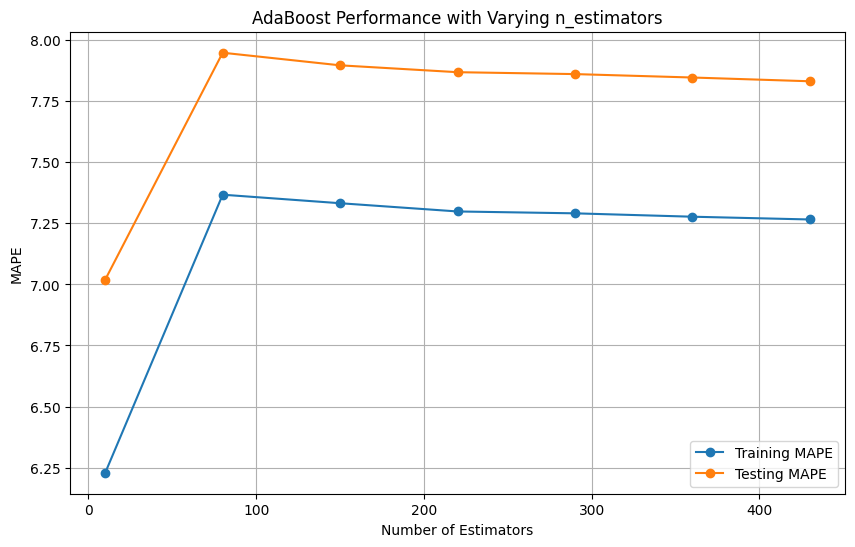

In [227]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_estimator_lst, mape_train, marker='o', label='Training MAPE')
plt.plot(n_estimator_lst, mape_test, marker='o', label='Testing MAPE')
plt.title('AdaBoost Performance with Varying n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
# display the results as a dataframe
n_est_results = pd.DataFrame({'Estimators': n_estimator_lst, 'MAPE': mape_test})
n_est_results.reset_index(drop=True, inplace=True)
display(n_est_results[0:10].style.hide(axis="index"))


##### Learning Rates

In [200]:
# Less computationally intensive than n_estimators tuning
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
mape_train, mape_test = [], []

for lr in learning_rates:
    model = AdaBoostRegressor(
        estimator=base_estimator,
        n_estimators=100,
        learning_rate=lr,
        random_state=777,
        loss= 'square'
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape_values_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_test.append(mape_values_test)
    mape_values_train = mean_absolute_percentage_error(y_train, model.predict(x_train))
    mape_train.append(mape_values_train)    

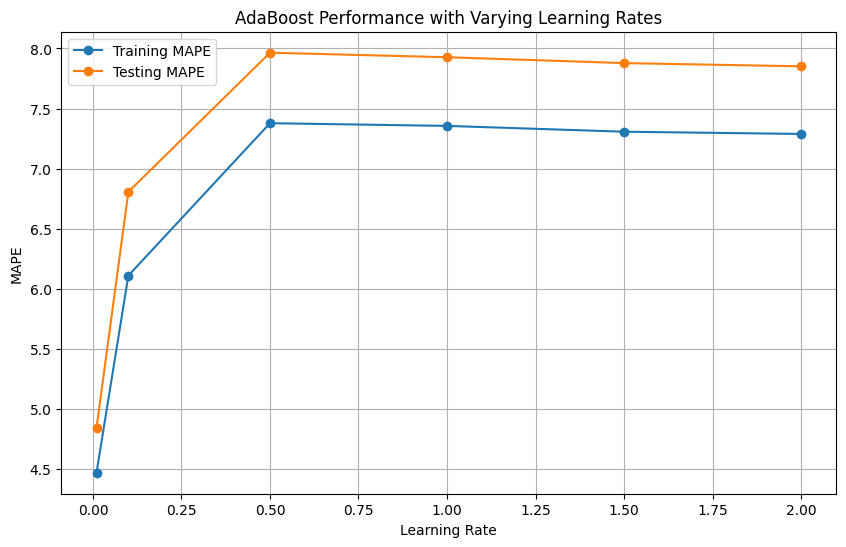

In [201]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mape_train, marker='o', label='Training MAPE')
plt.plot(learning_rates, mape_test, marker='o', label='Testing MAPE')
plt.title('AdaBoost Performance with Varying Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [202]:
# outputs a table of the MAPE results
learning_rate_mape_results = pd.DataFrame({'learning_rates': learning_rates, 'MAPE': mape_test})
learning_rate_mape_results.reset_index(drop=True, inplace=True)
display(learning_rate_mape_results[0:10].style.hide(axis="index"))

#### K-Fold Cross Validation

WARNING: This cell may take 10-30 minutes to run

In [229]:
from sklearn.model_selection import GridSearchCV, KFold

# Initialize the model
model = AdaBoostRegressor(estimator=base_estimator, random_state=777)

# KFold for regression
kfold = KFold(n_splits=5, shuffle=True, random_state=777)

# Parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Reduced from the original check
    'learning_rate': [0.01, 0.05, .1,.25],  # Reduced from the original check
    'estimator__max_depth': [5,7]  
}

# GridSearchCV
gs = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,  # Parallel processing
    scoring='neg_mean_absolute_percentage_error'
)

gs.fit(x_train, y_train)

print("\nBest parameters from GridSearchCV:")
print(gs.best_params_)
print(f"Best MAPE score: {-gs.best_score_:.4f}")



Best parameters from GridSearchCV:
{'estimator__max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 10}
Best MAPE score: 4.1899


#### Final Tuned Model

In [230]:
# Initialize with best parameters
best_ada = gs.best_estimator_

# Train final model
best_ada.fit(x_train, y_train)

# Evaluate
print("\nTuned AdaBoost Performance:")
perf(y_test, best_ada.predict(x_test))


Tuned AdaBoost Performance:


#### Feature Importance

Top 20 Important Features:


Feature  Importance
1                                       EDUC    0.368244
2                                     OCCSOC    0.310783
0                                        AGE    0.128393
5                                   UHRSWORK    0.052102
3                                        IND    0.045955
34                                  SEX_Male    0.019132
33                                SEX_Female    0.016258
6                                   TRANTIME    0.015285
11             MARST_Married, spouse present    0.012784
7                     CLASSWKR_Self-employed    0.009389
8                   CLASSWKR_Works for wages    0.007391
53     Education Administration and Teaching    0.005227
55                               Engineering    0.002377
29                   REGION_Pacific Division    0.002067
23                                RACE_White    0.001424
68  Medical and Health Sciences and Services    0.001008
49         Computer and Information Sciences    0.000570
41         SPEAKENG_Yes, speaks only English    0.000338
12                MARST_Never married/single    0.000294
26           REGION_Middle Atlantic Division    0.000240

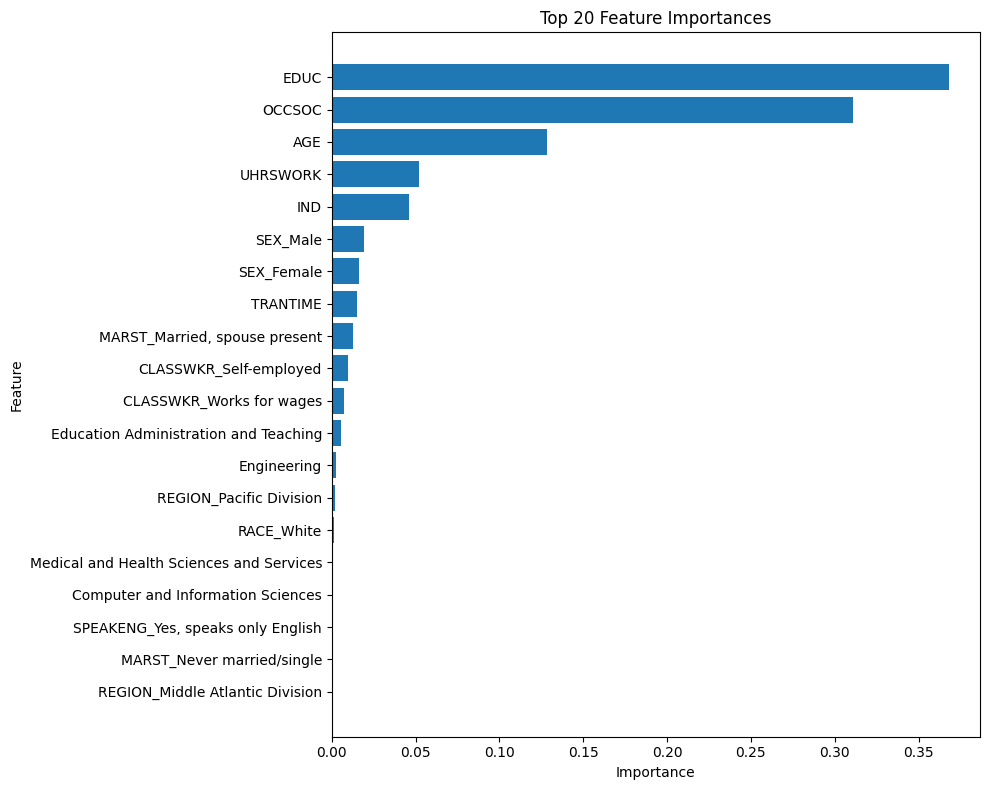

In [231]:
# Get feature names after encoding
feature_names = x_train.columns

# Get importance
importances = best_ada.feature_importances_

# Create DataFrame for easy viewing
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Show top 20 features
print("Top 20 Important Features:")
display(feat_imp.head(20))

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feat_imp['Feature'].head(20), feat_imp['Importance'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
for i in range(8,20):
    # Get the top n feature names
    top_n_features = feat_imp.head(i)['Feature'].tolist()

    # Filter training and test sets to only these features
    X_train_topn = x_train[top_n_features]
    X_test_topn = x_test[top_n_features]

    # Initialize new AdaBoost model with your best hyperparameters
    best_params = gs.best_params_  # From your GridSearchCV
    ada_topn = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=best_params['estimator__max_depth'],
            random_state=777
        ),
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        random_state=777,
        loss='linear'
    )

    # Train on top n features
    ada_topn.fit(X_train_topn, y_train)

    # Evaluate
    print(f"\nPerformance with Top {i} Features:")
    perf(y_test, ada_topn.predict(X_test_topn))



Performance with Top 8 Features:



Performance with Top 9 Features:



Performance with Top 10 Features:



Performance with Top 11 Features:



Performance with Top 12 Features:



Performance with Top 13 Features:



Performance with Top 14 Features:



Performance with Top 15 Features:



Performance with Top 16 Features:



Performance with Top 17 Features:



Performance with Top 18 Features:



Performance with Top 19 Features:


####  Best ADABoost Model

In [234]:
# Use the top 11 features
top_n_features = feat_imp.head(11)['Feature'].tolist()

# Filter training and test sets to only these features
X_train_topn = x_train[top_n_features]
X_test_topn = x_test[top_n_features]

# Initialize new AdaBoost model with your best hyperparameters
best_params = gs.best_params_  # From your GridSearchCV
ada_best = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(
        max_depth=best_params['estimator__max_depth'],
        random_state=777
    ),
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=777,
    loss='linear'
)

# Train on top n features
ada_best.fit(X_train_topn, y_train)

# Evaluate
print(f"\nPerformance with Top 11 Features:")
perf(y_test, ada_best.predict(X_test_topn))



Performance with Top 11 Features:


<br>

### Gradient Boost

Now let's start with a basic Gradient Boost model.

In [524]:
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=450, learning_rate=0.2, max_depth=9, random_state=777, loss='absolute_error')

# Train the model
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, loss='absolute_error', max_depth=9,
                          n_estimators=450, random_state=777)

In [526]:
# Make predictions
y_pred = gbr.predict(x_test)

In [528]:
# Evaluate the model
perf(y_test, y_pred) # output performance metrics

In [530]:
predictions_df = {
    'actual': y_test,
    'predicted': y_pred
}

In [532]:
# Calculate error
predictions_df['error'] = (predictions_df['actual'] - predictions_df['predicted'])

In [534]:
#Calculate mean absolute error
predictions_df['absolute_percentage_error'] = abs(predictions_df['error'] / predictions_df['actual']) * 100

In [536]:
predictions_df = pd.DataFrame(predictions_df)

In [538]:
# Filter rows where absolute percentage error is greater than 70%
highest_error_df = predictions_df[predictions_df['absolute_percentage_error'] > 70]

In [544]:
highest_error_df.to_csv('obs_with_highest_error')

In [546]:
len(highest_error_df)

11194

In [548]:
highest_error_df.head(20)

actual      predicted         error  absolute_percentage_error
173262   65000  112976.407681 -47976.407681                  73.809858
266106    7000   37230.974222 -30230.974222                 431.871060
172765    8400   27431.108218 -19031.108218                 226.560812
144507   15000   35511.629008 -20511.629008                 136.744193
402578   25000   52672.526964 -27672.526964                 110.690108
85661    14800   89042.833798 -74242.833798                 501.640769
371260    7500   44585.615266 -37085.615266                 494.474870
377422    8200   39687.906312 -31487.906312                 383.998857
447267   52000  127438.934393 -75438.934393                 145.074874
446093   14000   30919.636210 -16919.636210                 120.854544
240088   46000   94449.430784 -48449.430784                 105.324850
240066   18500   48967.873103 -30467.873103                 164.691206
251497   16000   28339.902140 -12339.902140                  77.124388
28547    10000   44215.469250 -34215.469250                 342.154693
68734     7000   25291.714903 -18291.714903                 261.310213
15763    26400   90411.245230 -64011.245230                 242.466838
415406   14400   25904.484637 -11504.484637                  79.892254
361635   42000   73667.295624 -31667.295624                  75.398323
474569    5200   43599.284744 -38399.284744                 738.447784
234692   29600   54433.569837 -24833.569837                  83.897195

This shows us where the greatest error is. From here, we can see if there is a pattern in the data contributing the most to the error.

#### Tuning

Next, let's tune using n-estimators...

##### N_Estimators

Next, let's test different values of n_estimators to find the optimal value for this hyperparameter. N_estimators represents the number of decision trees used to generate the predictions. 

In [580]:
n_estimator_lst = range(50, 550,50) # defines a list of values to try for n_estimators

Visualize the change in n_estimators

In [582]:
# generates a line graph of the training MAPE and testing MAPE for comparison

# List to store MAPE values
mape_train = []
mape_test = []

# Train and evaluate the model for each hyperparameter value
for n_estimators in n_estimator_lst:
    model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=777, loss='absolute_error')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape_values_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_test.append(mape_values_test)
    mape_values_train = mean_absolute_percentage_error(y_train, model.predict(x_train))
    mape_train.append(mape_values_train)


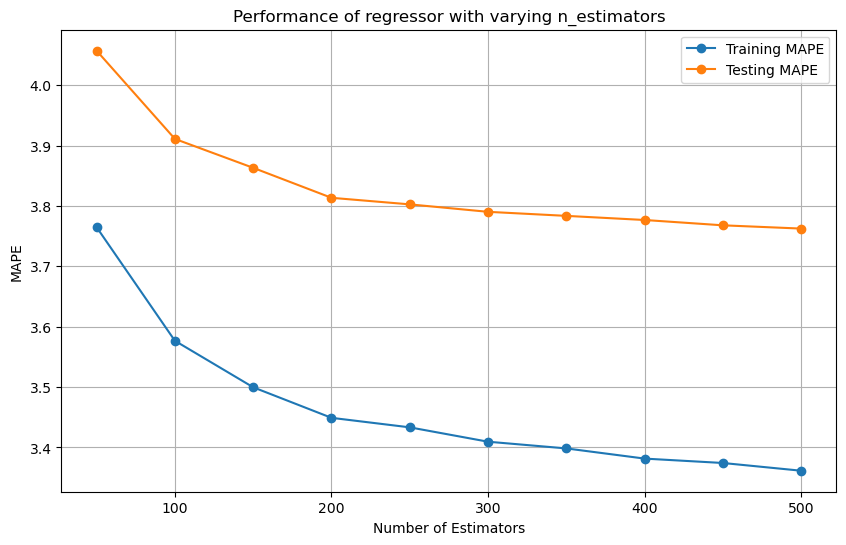

In [604]:
# generates a line graph of the training MAPE and testing MAPE for comparison
plt.figure(figsize=(10, 6))
plt.plot(n_estimator_lst, mape_train, marker='o', label='Training MAPE')
plt.plot(n_estimator_lst, mape_test, marker='o', label='Testing MAPE')
plt.title('Performance of regressor with varying n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [606]:
# display the results as a dataframe
n_est_results = pd.DataFrame({'Estimators': n_estimator_lst, 'MAPE': mape_test})
n_est_results.reset_index(drop=True, inplace=True)
display(n_est_results[3:10].style.hide(axis="index"))

Comment on outcome __TBD__

In [609]:
perf(y_test, y_pred)

In [613]:
#store_metrics('Gradient Boost') # saving these metrics for comparison across models

Hyperparameter Tuning

##### Max_depth

First, we'll try varying maximum depth to better understand hyperparameter tuning.

In [620]:
max_depths = range(1, 20) # defines a list of values to try for max_depth

In [628]:
# generates a line graph of the training MAPE and testing MAPE for comparison

# List to store MAPE values
mape_train = []
mape_test = []

# Train and evaluate the model for each hyperparameter value
for depth in max_depths:
    model = GradientBoostingRegressor(max_depth=depth, random_state=777, loss='absolute_error')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape_values_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_test.append(mape_values_test)
    mape_values_train = mean_absolute_percentage_error(y_train, model.predict(x_train))
    mape_train.append(mape_values_train)

Visualize the change in max_depth

<Figure size 1000x600 with 0 Axes>

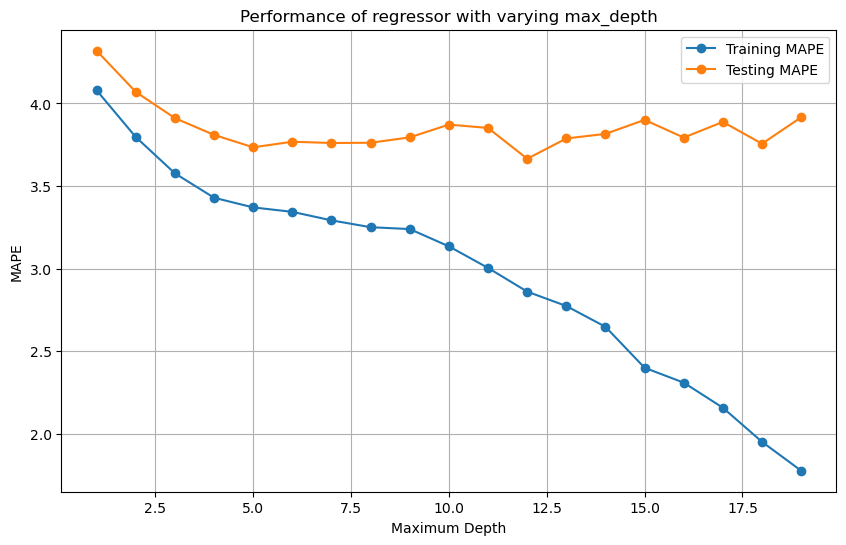

In [630]:
# generates a line graph of the training MAPE and testing MAPE for comparison
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mape_train, marker='o', label='Training MAPE')
plt.plot(max_depths, mape_test, marker='o', label='Testing MAPE')
plt.title('Performance of regressor with varying max_depth')
plt.xlabel('Maximum Depth')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [631]:
# outputs a table of the AUC results
max_depth_mape_results = pd.DataFrame({'max_depth': max_depths, 'MAPE': mape_test})
max_depth_mape_results.reset_index(drop=True, inplace=True)
display(max_depth_mape_results[5:15].style.hide(axis="index"))

Comment on hyperparameters: TBD

### K-Fold Cross Validation

In this section, we use k-fold cross validation can be used in tandem with GridSearchCV to find the optimal hyperparameter values for multiple hyperparameters simultantously.

In [635]:
# Note that K-fold cross validation is processor-intensive. It may take some time to run. 
# This section can be skipped.

In [636]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
model = GradientBoostingRegressor(random_state=777)

# Use KFold for regression problems
kfold = KFold(n_splits=5, shuffle=True, random_state=777)

# Set up GridSearchCV
gs = GridSearchCV(model,
                  param_grid={'max_depth': range(7, 20),
                              'n_estimators': range(200, 600, 50)},
                  cv=kfold,
                  n_jobs=-1,
                  scoring='neg_mean_absolute_percentage_error')

# Fit the model
gs.fit(x_train, y_train)

# Print the best parameters and best score
print(gs.best_params_)
print(gs.best_score_)

NameError: name 'X_train' is not defined

Based on the cross-validation results, the best hyperparameters to use are max_depth = 9 and n_estimators = 450.

#### Tuned Model

Here, we re-run the model using the optimal hyperparameters.

In [ ]:
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=450, learning_rate=0.2, max_depth=9, random_state=777, loss='absolute_error')

# Train the model
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
perf(y_test, y_pred) # output performance metrics

In [ ]:
# Re-run the model using the optimal n_estimators value
gb = GradientBoostingClassifier(n_estimators=100,random_state=890)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

<br>

#### Simulation

Here, we simulate outcomes for males vs. females for comparison.

In [1113]:
x_test_m = X_test.copy()
x_test_m['SEX_Female'] = 0.0
x_test_m['SEX_Male'] = 1.0

In [5]:
#x_test_m.columns.tolist()

In [1123]:
x_test_f = X_test.copy()
x_test_f['SEX_Female'] = 1.0
x_test_f['SEX_Male'] = 0.0

In [1119]:
y_pred_m = gbr.predict(x_test_m)

In [1125]:
y_pred_f = gbr.predict(x_test_f)

In [1127]:
y_pred_m.mean()

62808.490678134054

In [ ]:
perf(y_test, y_pred) # output performance metrics

In [1129]:
y_pred_f.mean()

55264.425799437304

<br>

In [ ]:
metrics_df = pd.DataFrame(columns=['Metric'])

def store_metrics(model_name):
    global metrics_df
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Create a dictionary of metrics
    metrics = {
        'Accuracy': acc,
        'AUC': roc_auc
    }
    
    # Add metrics to the DataFrame
    for metric, value in metrics.items():
        if metric not in metrics_df['Metric'].values:
            new_row = pd.DataFrame({'Metric': [metric]})
            metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
        metrics_df.loc[metrics_df['Metric'] == metric, model_name] = value

#    return metrics_df


In [ ]:
store_metrics('Gradient Boost') # saving these metrics for comparison across models

### AdaBoost Model

First, we start with a basic AdaBoost Model.

In [ ]:
ada = AdaBoostClassifier(random_state=890) # Defining the model type, and setting a random_state for consistency. All other hyperparameters are default.
ada.fit(x_train, y_train) # training the model using the training data
y_pred = ada.predict(x_test) # predict results based on the test data

In [ ]:
perf(y_test, y_pred) # call custom function to report on performance

Now that we have a baseline, showing the performance using the defaults, we will vary n_estimators and see if a different number of decision trees can perform better.

In [ ]:
n_estimator_lst = range(50, 550,50) # defines a list of values to try for n_estimators
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

for n_estimators in n_estimator_lst:
    # train with hyperparameter
    ada = AdaBoostClassifier(n_estimators=n_estimators, random_state=890)
    ada.fit(x_train, y_train)

    #Predict results for training set and log metics AUC and accuracy
    train_y_pred = ada.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metics AUC and accuracy
    y_pred = ada.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in n_estimators

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(n_estimator_lst, train_auc, 'b', label="Train AUC")
line2, = plt.plot(n_estimator_lst, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(n_estimator_lst, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(n_estimator_lst, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

Optimal n_estimators is 50. In both graphs, there is a steep decline between 50 and 100 estimators, suggesting an increase in estimators degrades predictive ability.

In [ ]:
ada = AdaBoostClassifier(n_estimators=50,random_state=890)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

In [ ]:
perf(y_test, y_pred)

In [ ]:
store_metrics('Ada Boost') # saving these metrics for comparison across models

### Extreme Gradient Boosting (XGB)

Here, we start with a basic XGB model.

In [1019]:
xgb = XGBRegressor(random_state=777) # define model
xgb.fit(x_train, y_train) #train
y_pred = xgb.predict(x_test) # predict

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670], got [     0      4     10     20     30     50     60     70    100    120
    130    150    160    180    190    200    210    240    250    270
    290    300    350    360    400    480    500    520    550    560
    600    650    680    700    750    800    850    900    950   1000
   1100   1200   1300   1400   1500   1600   1700   1800   1900   2000
   2100   2300   2400   2500   2600   2700   2800   2900   3000   3100
   3200   3300   3400   3500   3600   3700   3800   3900   4000   4100
   4200   4300   4400   4500   4600   4700   4800   4900   5000   5100
   5200   5300   5400   5500   5600   5700   5800   5900   6000   6100
   6200   6300   6400   6500   6600   6700   6800   6900   7000   7100
   7200   7300   7400   7500   7600   7700   7800   7900   8000   8100
   8200   8300   8400   8500   8600   8700   8800   8900   9000   9100
   9200   9300   9400   9500   9600   9700   9800   9900  10000  10100
  10200  10300  10400  10500  10600  10700  10800  10900  11000  11100
  11200  11300  11400  11500  11600  11700  11800  11900  12000  12100
  12200  12300  12400  12500  12600  12700  12800  12900  13000  13100
  13200  13300  13400  13500  13600  13700  13800  13900  14000  14100
  14200  14300  14400  14500  14600  14700  14800  14900  15000  15100
  15200  15300  15400  15500  15600  15700  15800  15900  16000  16100
  16200  16300  16400  16500  16600  16700  16800  16900  17000  17100
  17200  17300  17400  17500  17600  17700  17800  17900  18000  18100
  18200  18300  18400  18500  18600  18700  18800  18900  19000  19100
  19200  19300  19400  19500  19600  19700  19800  19900  20000  20100
  20200  20300  20400  20500  20600  20700  20800  20900  21000  21100
  21200  21300  21400  21500  21600  21700  21800  21900  22000  22100
  22200  22300  22400  22500  22600  22700  22800  22900  23000  23100
  23200  23300  23400  23500  23600  23700  23800  23900  24000  24100
  24200  24300  24400  24500  24600  24700  24800  24900  25000  25100
  25200  25300  25400  25500  25600  25700  25800  25900  26000  26100
  26200  26300  26400  26500  26600  26700  26800  26900  27000  27100
  27200  27300  27400  27500  27600  27700  27800  27900  28000  28100
  28200  28300  28400  28500  28600  28700  28800  28900  29000  29100
  29200  29300  29400  29500  29600  29700  29800  29900  30000  30100
  30200  30300  30400  30500  30600  30700  30800  30900  31000  31100
  31200  31300  31400  31500  31600  31700  31800  31900  32000  32100
  32200  32300  32400  32500  32600  32700  32800  32900  33000  33100
  33200  33300  33400  33500  33600  33700  33800  33900  34000  34100
  34200  34300  34400  34500  34600  34700  34800  34900  35000  35100
  35200  35300  35400  35500  35600  35700  35800  35900  36000  36100
  36200  36300  36400  36500  36600  36700  36800  36900  37000  37100
  37200  37300  37400  37500  37600  37700  37800  37900  38000  38100
  38200  38300  38400  38500  38600  38700  38800  38900  39000  39100
  39200  39300  39400  39500  39600  39700  39800  39900  40000  40100
  40200  40300  40400  40500  40600  40700  40800  40900  41000  41100
  41200  41300  41400  41500  41600  41700  41800  41900  42000  42100
  42200  42300  42400  42500  42600  42700  42800  42900  43000  43100
  43200  43300  43400  43500  43600  43700  43800  43900  44000  44100
  44200  44300  44400  44500  44600  44700  44800  44900  45000  45100
  45200  45300  45400  45500  45600  45700  45800  45900  46000  46100
  46200  46300  46400  46500  46600  46700  46800  46900  47000  47100
  47200  47300  47400  47500  47600  47700  47800  47900  48000  48100
  48200  48300  48400  48500  48600  48700  48800  48900  49000  49100
  49200  49300  49400  49500  49600  49700  49800  49900  50000  51000
  52000  53000  54000  55000  56000  57000  58000  59000  60000  61000
  62000  63000  64000  65000  66000  67000  68000  69000  70000  71000
  72000  73000  74000  75000  76000  77000  78000  79000  80000  81000
  82000  83000  84000  85000  86000  87000  88000  89000  90000  91000
  92000  93000  94000  95000  96000  97000  98000  99000 100000 101000
 102000 103000 104000 105000 106000 107000 108000 109000 110000 111000
 112000 113000 114000 115000 116000 117000 118000 119000 120000 121000
 122000 123000 124000 125000 126000 127000 128000 129000 130000 131000
 132000 133000 134000 135000 136000 137000 138000 139000 140000 141000
 142000 143000 144000 145000 146000 147000 148000 149000 150000 151000
 152000 153000 154000 155000 156000 157000 158000 159000 160000 161000
 162000 163000 164000 165000 166000 167000 168000 169000 170000 171000
 172000 173000 174000 175000 176000 177000 178000 179000 180000 181000
 182000 183000 184000 185000 186000 187000 188000 189000 190000 191000
 192000]

In [ ]:
perf(y_test, y_pred) # output metrics

Now we tune using n_estimators.

In [ ]:
n_estimator_lst = range(50, 550, 50) # creates a list of values we will try for n_estimators
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

# loops through the different hyperparameter values and stores the performance
for n_estimators in n_estimator_lst:
    # train with hyperparameter
    xgb = XGBClassifier(n_estimators=n_estimators, random_state=890)
    xgb.fit(x_train, y_train)

    #Predict results for training set and log metics AUC and accuracy
    train_y_pred = xgb.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metics AUC and accuracy
    y_pred = xgb.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in n_estimators

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(n_estimator_lst, train_auc, 'b', label="Train AUC")
line2, = plt.plot(n_estimator_lst, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(n_estimator_lst, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(n_estimator_lst, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

Accuracy and AUC decline as more estimators are added. For this reason, we should keep n_estimators low. The optimal value from those tested is 50.

In [ ]:
# re-running the model with the optimal value for n_estimators
xgb = XGBClassifier(n_estimators=50,random_state=890)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [ ]:
perf(y_test, y_pred) # output metics

In [ ]:
store_metrics('XGB') # saving these metrics for comparison across models

### Choosing the Best Model

In [ ]:
metrics_df # this is the dataframe where all our stored metrics from the different models is housed

The best of our tuned ensemble models is ________TBD________.

In [ ]:
# running the best model
best_model = GradientBoostingClassifier(n_estimators=100,random_state=890)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [ ]:
perf(y_test, y_pred)

### Step 3: Predictor

In this section, a single prediction can be made using our best model. To change the input, alter the user_input dictionary. Values should match bin formats from the initial dataset verbatim, except for hours, education years, and age, which can be entered as a number.

#### User Input

In [ ]:
predictor_df = abt_prepped.copy()

In [ ]:
predictor_df = predictor_df.drop(predictor_df.index)

In [ ]:
predictor_df.head()

In [ ]:
user_input = {'hrs': 48, 'occ': 'b. Mid - Low', 'msr': 'c. High', 'gain': 'c. > 0', 'race-sex': 'b. Mid', 'ed_yrs': 12, 'ed': 'e. High', 'class': 'b. income', 'age': 58}

In [ ]:
abt['hours_per_week_bin'].unique()

In [ ]:
if 0 <= user_input['ed_yrs'] <= 8:
    ed_group = 'a. 0-8'
elif 9 <= user_input['ed_yrs'] <= 12:
    ed_group = 'b. 9-12'
elif user_input['ed_yrs'] == 13:
    ed_group = 'c. 13'
elif user_input['ed_yrs'] == 14:
    ed_group = 'd. 14'
elif user_input['ed_yrs'] >= 15:
    ed_group = 'e. 15+'
else:
    ed_group = 'Unknown'

print(ed_group)

In [ ]:
if 0 <= user_input['hrs'] <= 30:
    hrs_group = 'a. 0-30'
elif 31 <= user_input['hrs'] <= 40:
    hrs_group = 'b. 31-40'
elif 41 <= user_input['hrs'] <= 50 or 61 <= user_input['hrs'] <= 70:
    hrs_group = 'd. 41-50 & 61-70'
elif 51 <= user_input['hrs'] <= 60:
    hrs_group = 'e. 51-60'
elif 71 <= user_input['hrs'] <= 100:
    hrs_group = 'c. 71-100'
else:
    hrs_group = 'Unknown'

print(hrs_group)

In [ ]:
pred_input = user_input

In [ ]:
pred_input['age'] = age_group

In [ ]:
pred_input['ed_yrs'] = ed_group

In [ ]:
pred_input['hrs'] = hrs_group

In [ ]:
pred_input

In [ ]:
# The new input needs to be encoded in the same way as the training data, so here we add the input as the first row in the dataset and perform the encoding again.
reencode = df.copy()
reencode = reencode.drop(['y','flag'], axis=1)

In [ ]:
reencode.head()

In [ ]:
reencode.iloc[0] = list(pred_input.values()) # add user input
reencode.head()

In [ ]:
# Apply encoding to each column
for col in ['occupation_bin', 'msr_bin', 'race_sex_bin', 'education_num_bin']:
    reencode[col + '_Encoded'] = encode_column(reencode[col])

In [ ]:
reencode.drop('education_bin', axis=1, inplace=True)

Now we must encode the nominal features.

In [ ]:
# One-Hot Encoding for nominal columns
nominal_columns = ['age_bin', 'capital_gl_bin', 'hours_per_week_bin', 'workclass_bin']
reencode = pd.get_dummies(reencode, columns=nominal_columns)

In [ ]:
# Drop the old columns, keeping only the encoded columns
reencode = reencode.iloc[:,4:]   
reencode.head()

In [ ]:
# Some models cannot accept special characters in the column name, so we must rename them.
# Define a mapping for renaming columns
rename_mapping = {
    'age_bin_a. 0-25': 'age_bin_0_25',
    'age_bin_b. 26-30 & 71-100': 'age_bin_26_30_71_100',
    'age_bin_c. 31-35 & 61-70': 'age_bin_31_35_61_70',
    'age_bin_d. 36-40 & 56-60': 'age_bin_36_40_56_60',
    'age_bin_e. 40-55': 'age_bin_40_55',
    'capital_gl_bin_a. = 0': 'capital_gl_0',
    'capital_gl_bin_b. < 0': 'capital_gl_less_thn_0',
    'capital_gl_bin_c. > 0': 'capital_gl_greater_thn_0',
    'hours_per_week_bin_a. 0-30': 'hours_per_week_0_30',
    'hours_per_week_bin_b. 31-40': 'hours_per_week_31_40',
    'hours_per_week_bin_c. 71-100': 'hours_per_week_71_100',
    'hours_per_week_bin_d. 41-50 & 61-70': 'hours_per_week_41_50_61_70',
    'hours_per_week_bin_e. 51-60': 'hours_per_week_51_60',
    'workclass_bin_a. no income': 'workclass_no_income',
    'workclass_bin_b. income': 'workclass_income'
}

# Rename columns
reencode.rename(columns=rename_mapping, inplace=True)

In [ ]:
reencode.head()

In [ ]:
# Keep only the first row (the new user input data)
first_row_df = reencode.iloc[:1]

#### Prediction

In [ ]:
pred=best_model.predict(first_row_df)

In [ ]:
print(f"Predicted income level is {'>$50K' if pred == 1 else '<=$50K'}")

In [ ]:
probabilities = best_model.predict_proba(first_row_df)

In [ ]:
probabilities

Outcome comment: __TBD__

##### (End)